In [227]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import   seasonal_decompose
from IPython.display import display
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
%matplotlib inline

In [228]:
def parse(x):
    return datetime.strptime(x, '%Y-%m')

In [229]:
sparkling=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sparkling.csv',index_col=0,parse_dates=True,date_parser=parse)

In [230]:
sparkling.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [231]:
sparkling.tail(15)

Sparkling
YearMonth            
1994-05-01       1674
1994-06-01       1693
1994-07-01       2031
1994-08-01       1495
1994-09-01       2968
1994-10-01       3385
1994-11-01       3729
1994-12-01       5999
1995-01-01       1070
1995-02-01       1402
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [232]:
sparkling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [233]:
sparkling.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [234]:
sparkling.rename(columns={'Sparkling':'Sales'},inplace=True)

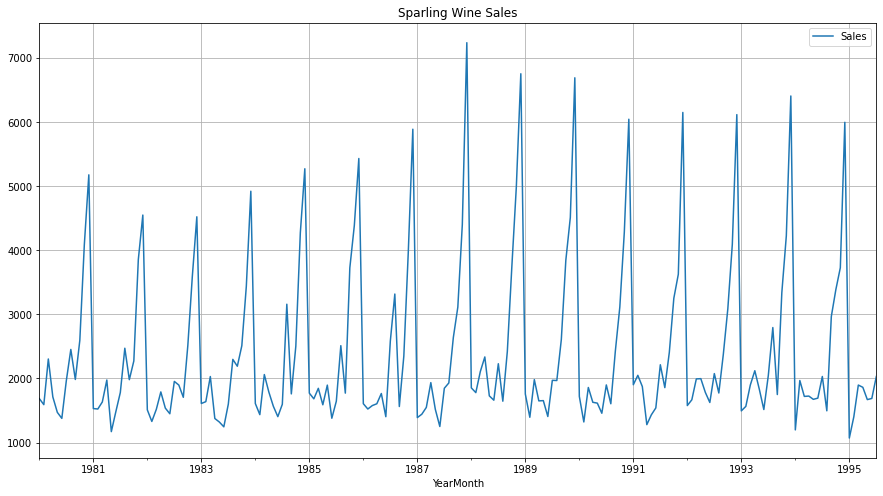

In [235]:
plt.rcParams['figure.figsize'] = 15,8
sparkling.plot()
plt.title('Sparling Wine Sales')
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot YoY Wine Sales')

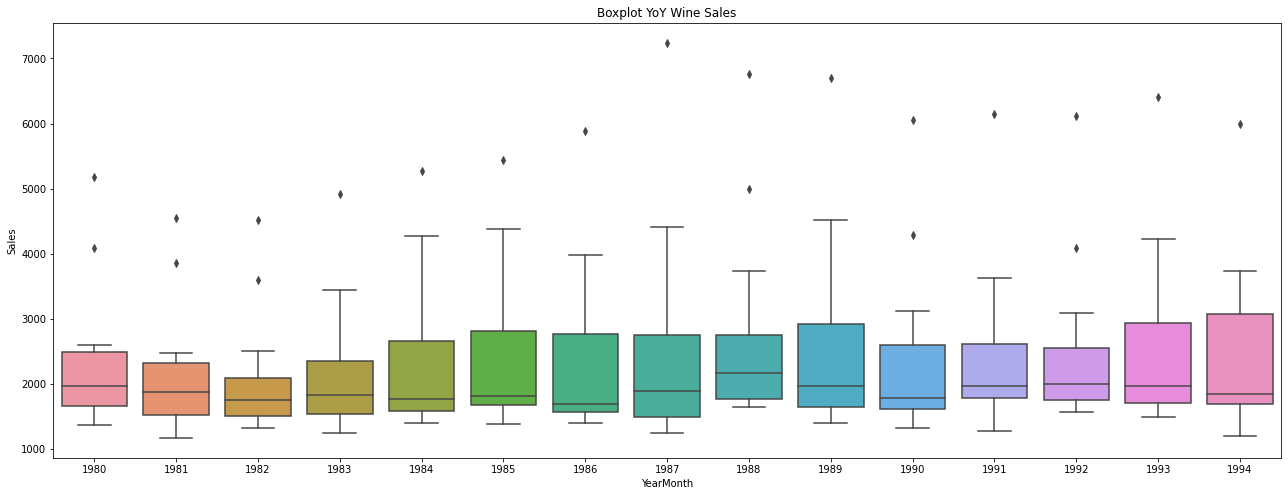

In [236]:
plt.figure(figsize=(22,8))
data=sparkling[sparkling.index.year<1995]
sns.boxplot(data.index.year,data.Sales)
plt.title('Boxplot YoY Wine Sales')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot Monthly Wine Sales')

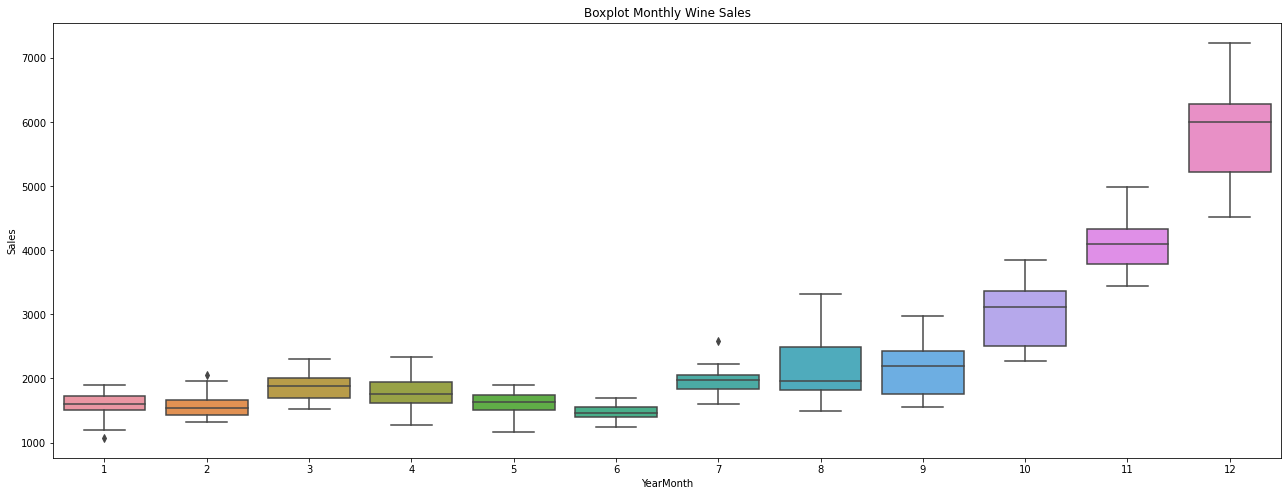

In [237]:
plt.figure(figsize=(22,8))
sns.boxplot(sparkling.index.month,sparkling.Sales)
plt.title('Boxplot Monthly Wine Sales')

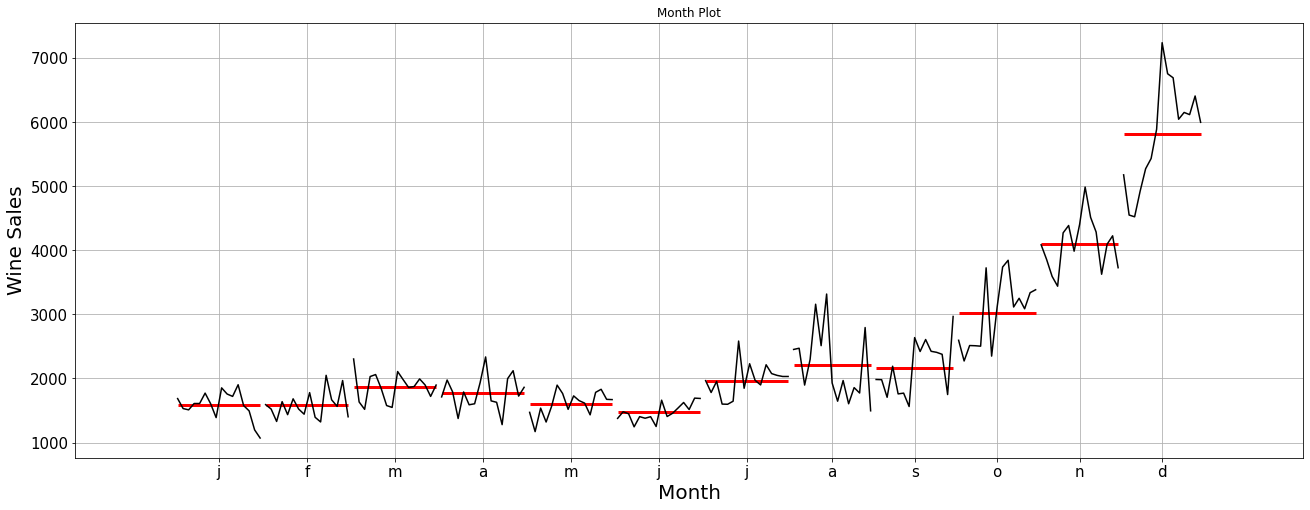

In [238]:
fig, ax = plt.subplots(figsize=(22,8))
month_plot(sparkling.Sales,ax=ax)
plt. ylabel('Wine Sales', fontsize=20)
plt. xlabel('Month', fontsize=20)
plt. xticks( fontsize=15)
plt. yticks( fontsize=15)
plt.title('Month Plot')
plt.grid();

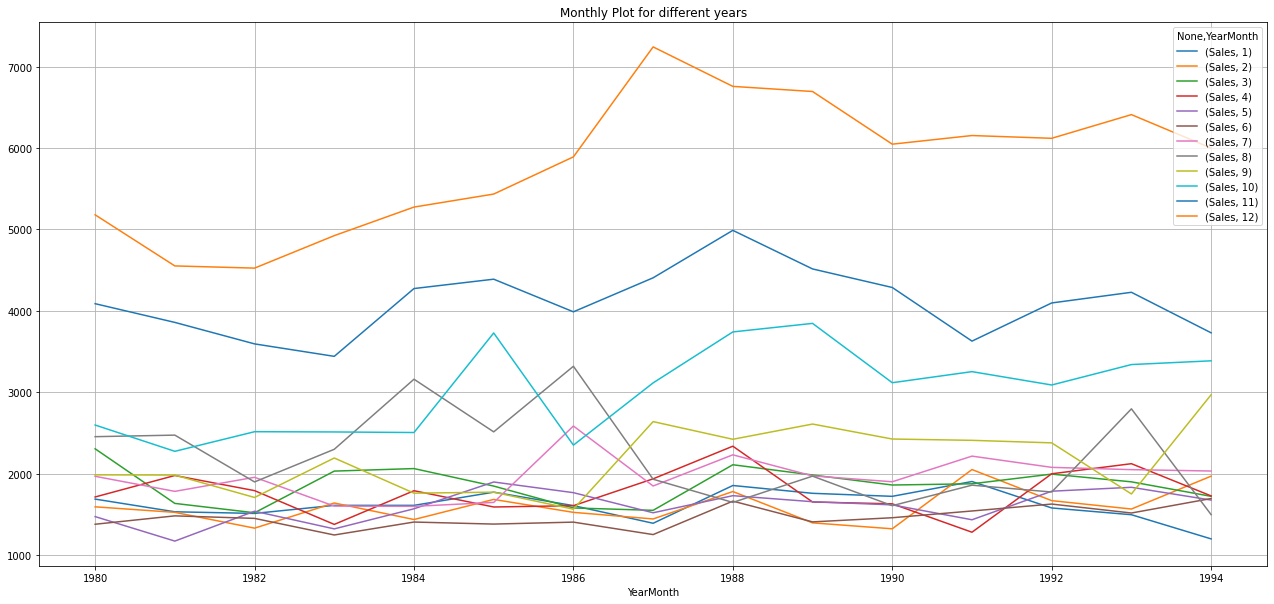

In [239]:
fig, ax = plt.subplots(figsize=(22,10))
y_sales_month=pd.pivot_table(data,values=data,index=data.index.year,columns=data.index.month)
y_sales_month.plot(ax=ax)
plt.title('Monthly Plot for different years')
plt.grid();

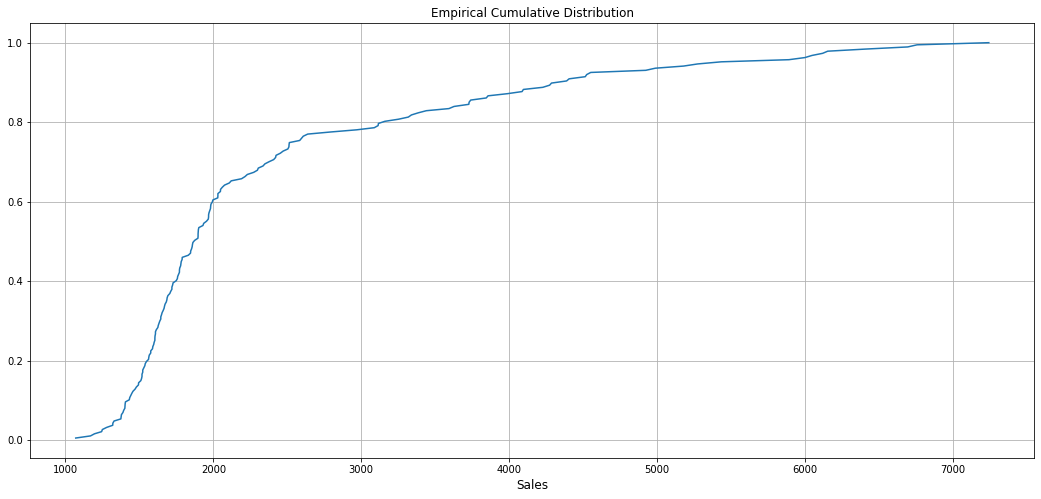

In [240]:
plt.figure(figsize = (18, 8))
cdf = ECDF(sparkling['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.title('Empirical Cumulative Distribution')

plt.xlabel('Sales',fontsize=12);

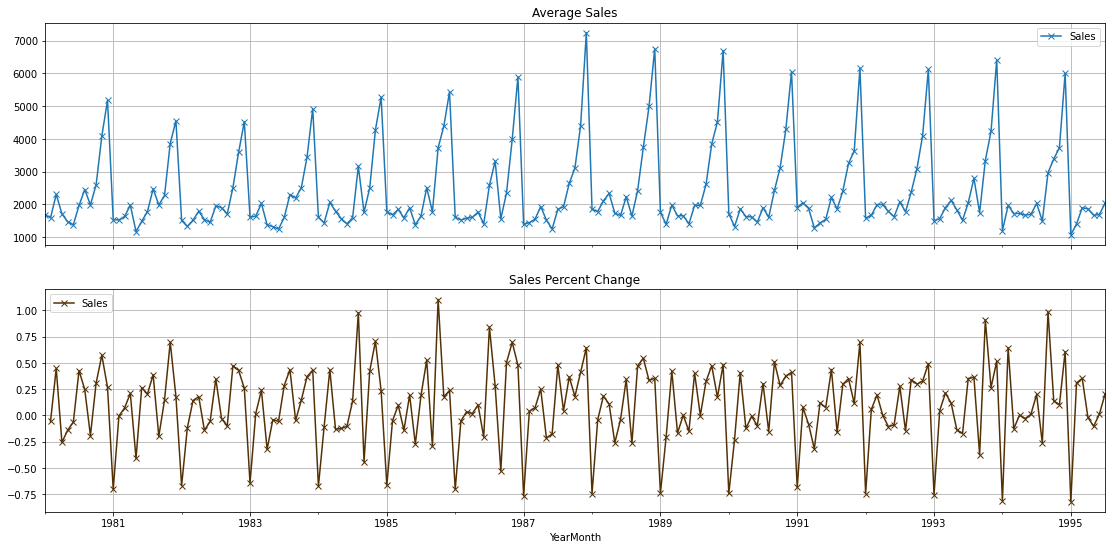

In [241]:
avg    = sparkling.groupby(sparkling.index)["Sales"].mean()
pct_change = sparkling.groupby(sparkling.index)["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(19,9))

# plot average Sales over time(year-month)
ax1 = avg.plot(legend=True,ax=axis1,marker='x',title="Average Sales",grid=True)
ax1.set_xticks(range(len(avg)))
ax1.set_xticklabels(avg.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='x',colormap="BrBG",title="Sales Percent Change",grid=True)

In [242]:
sparkling_yearly=sparkling[sparkling.index.year<1996].resample('A').sum()
sparkling_yearly.head()

Sales
YearMonth        
1980-12-31  28406
1981-12-31  26227
1982-12-31  25321
1983-12-31  26180
1984-12-31  28431

Text(0.5, 1.0, 'Sum of Sales each year')

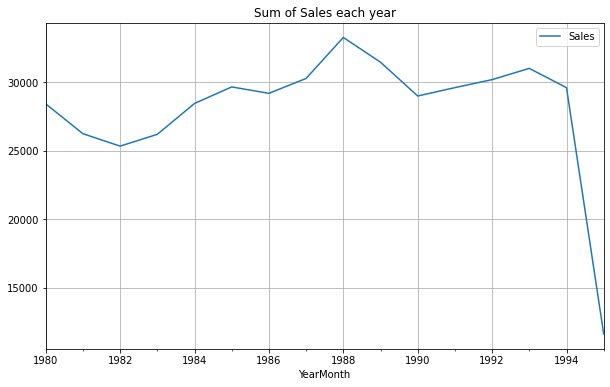

In [243]:
plt.rcParams['figure.figsize'] = 10,6
sparkling_yearly.plot()
plt.grid()
plt.title('Sum of Sales each year')

Text(0.5, 1.0, 'Average Sales each year')

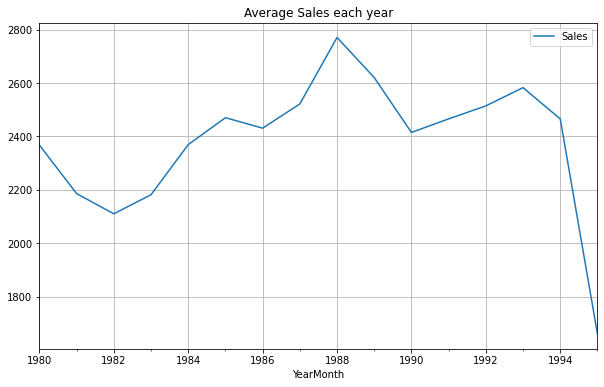

In [244]:
sparkling_yearly_avg=sparkling[sparkling.index.year<1996].resample('A').mean()
sparkling_yearly_avg.plot()
plt.grid()
plt.title('Average Sales each year')

Text(0.5, 1.0, 'Sum of Sales each quarter')

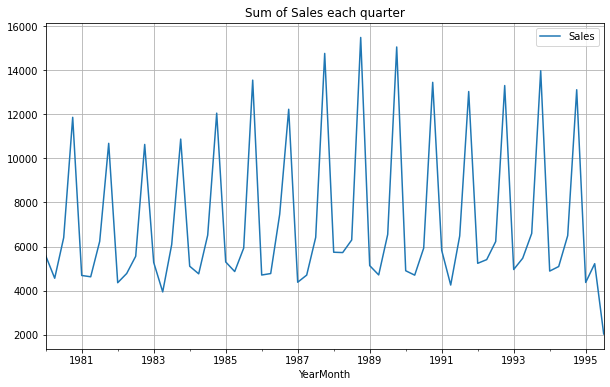

In [245]:
sparkling_quarterly=sparkling[sparkling.index.year<1996].resample('Q').sum()
sparkling_quarterly.plot()
plt.grid()
plt.title('Sum of Sales each quarter')

Text(0.5, 1.0, 'Avg Sales each quarter')

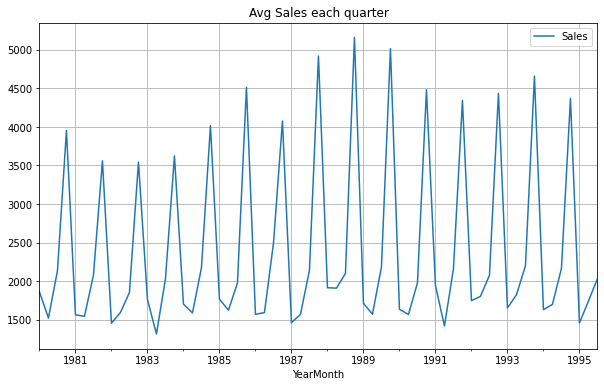

In [246]:
sparkling_quarterly_avg=sparkling[sparkling.index.year<1996].resample('Q').mean()
sparkling_quarterly_avg.plot()
plt.grid()
plt.title('Avg Sales each quarter')

In [247]:
quarter=['Q1','Q2','Q3','Q4']
sparkling_quarterly=sparkling[sparkling.index.year<1995].resample('Q').sum()
sparkling_quarterly['Quarter']=quarter*15
sparkling_quarterly

Sales Quarter
YearMonth                
1980-03-31   5581      Q1
1980-06-30   4560      Q2
1980-09-30   6403      Q3
1980-12-31  11862      Q4
1981-03-31   4686      Q1
1981-06-30   4626      Q2
1981-09-30   6234      Q3
1981-12-31  10681      Q4
1982-03-31   4357      Q1
1982-06-30   4776      Q2
1982-09-30   5557      Q3
1982-12-31  10631      Q4
1983-03-31   5277      Q1
1983-06-30   3940      Q2
1983-09-30   6089      Q3
1983-12-31  10874      Q4
1984-03-31   5105      Q1
1984-06-30   4760      Q2
1984-09-30   6515      Q3
1984-12-31  12051      Q4
1985-03-31   5299      Q1
1985-06-30   4864      Q2
1985-09-30   5928      Q3
1985-12-31  13549      Q4
1986-03-31   4706      Q1
1986-06-30   4773      Q2
1986-09-30   7464      Q3
1986-12-31  12227      Q4
1987-03-31   4379      Q1
1987-06-30   4703      Q2
1987-09-30   6415      Q3
1987-12-31  14761      Q4
1988-03-31   5740      Q1
1988-06-30   5725      Q2
1988-09-30   6296      Q3
1988-12-31  15485      Q4
1989-03-31   5133      Q1
1989-06-30   4710      Q2
1989-09-30   6547      Q3
1989-12-31  15053      Q4
1990-03-31   4900      Q1
1990-06-30   4700      Q2
1990-09-30   5928      Q3
1990-12-31  13449      Q4
1991-03-31   5825      Q1
1991-06-30   4251      Q2
1991-09-30   6479      Q3
1991-12-31  13032      Q4
1992-03-31   5237      Q1
1992-06-30   5405      Q2
1992-09-30   6226      Q3
1992-12-31  13303      Q4
1993-03-31   4956      Q1
1993-06-30   5467      Q2
1993-09-30   6592      Q3
1993-12-31  13976      Q4
1994-03-31   4885      Q1
1994-06-30   5092      Q2
1994-09-30   6494      Q3
1994-12-31  13113      Q4

In [248]:
quarterly_turnover = pd.pivot_table(sparkling_quarterly, values = "Sales", columns = "Quarter", index = sparkling_quarterly.index.year)
quarterly_turnover

Quarter      Q1    Q2    Q3     Q4
YearMonth                         
1980       5581  4560  6403  11862
1981       4686  4626  6234  10681
1982       4357  4776  5557  10631
1983       5277  3940  6089  10874
1984       5105  4760  6515  12051
1985       5299  4864  5928  13549
1986       4706  4773  7464  12227
1987       4379  4703  6415  14761
1988       5740  5725  6296  15485
1989       5133  4710  6547  15053
1990       4900  4700  5928  13449
1991       5825  4251  6479  13032
1992       5237  5405  6226  13303
1993       4956  5467  6592  13976
1994       4885  5092  6494  13113

Text(0, 0.5, 'Total Sales')

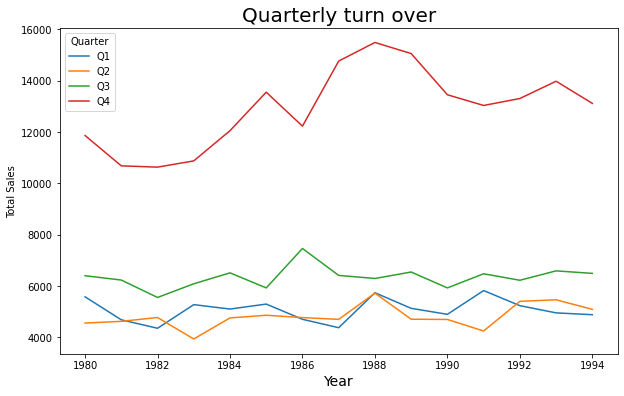

In [249]:
quarterly_turnover.plot()
plt.title('Quarterly turn over',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Total Sales')

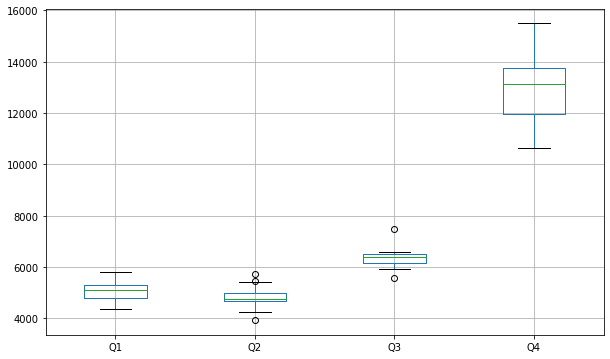

In [250]:
quarterly_turnover.boxplot()

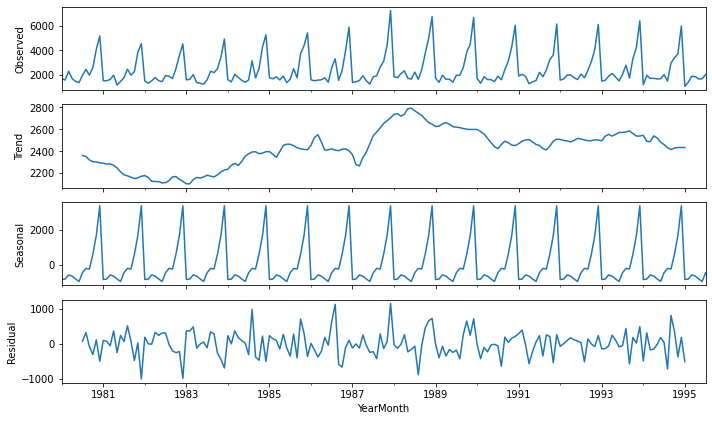

In [251]:
decomposition=seasonal_decompose(sparkling['Sales'],model='additive',freq=12)
decomposition.plot();


In [252]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: Sales, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: Sales, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290
198

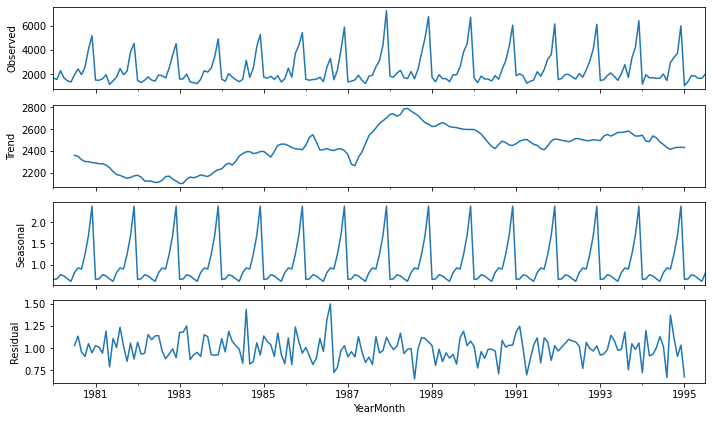

In [253]:
decomposition=seasonal_decompose(sparkling['Sales'],model='multiplicative',freq=12)
decomposition.plot();

In [254]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: Sales, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: Sales, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: Sales, 

## 3. Split the data into training and test. The test data should start in 1991.

In [255]:
train=sparkling[sparkling.index.year<1991]
test=sparkling[sparkling.index.year>1990]

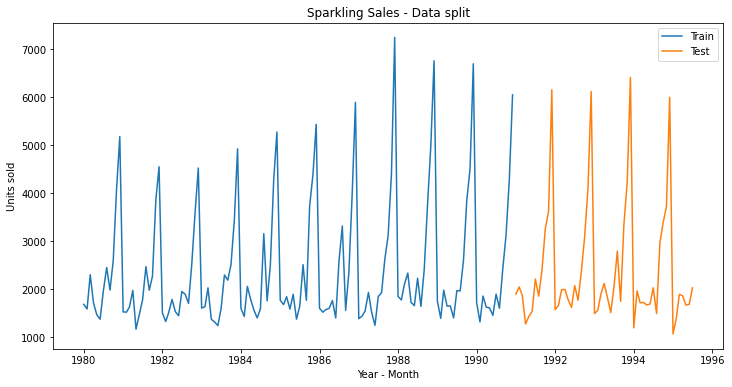

In [256]:
plt.figure(figsize = (12, 6))
plt.plot(train['Sales'], label = 'Train')
plt.plot(test['Sales'], label = 'Test')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling Sales - Data split', fontsize = 12)
plt.show;

In [257]:
## Mean Absolute Percentage Error 
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape



In [258]:
def calc_metrics(y,yhat):
    rmse=metrics.mean_squared_error(y,yhat,squared=False)
    mape=MAPE(y,yhat)
    return rmse,mape

In [259]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sales
YearMonth        
1980-01-01   1686
1980-02-01   1591
1980-03-01   2304
1980-04-01   1712
1980-05-01   1471

Last few rows of Training Data


Sales
YearMonth        
1990-08-01   1605
1990-09-01   2424
1990-10-01   3116
1990-11-01   4286
1990-12-01   6047

First few rows of Test Data


Sales
YearMonth        
1991-01-01   1902
1991-02-01   2049
1991-03-01   1874
1991-04-01   1279
1991-05-01   1432

Last few rows of Test Data


Sales
YearMonth        
1995-03-01   1897
1995-04-01   1862
1995-05-01   1670
1995-06-01   1688
1995-07-01   2031

## Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

## Model 1: Linear Regression

In [260]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]

In [261]:
lr_train=pd.DataFrame(train.copy())
lr_test=pd.DataFrame(test.copy())

In [262]:
lr_train['Time']=train_time
lr_test['Time']=test_time

In [263]:
lr=LinearRegression()
lr.fit(np.array(lr_train['Time']).reshape(-1,1),lr_train['Sales'])

LinearRegression()

In [264]:
lr_train['Predict']=lr.predict(np.array(lr_train['Time']).reshape(-1,1))
lr_test['Predict']=lr.predict(np.array(lr_test['Time']).reshape(-1,1))

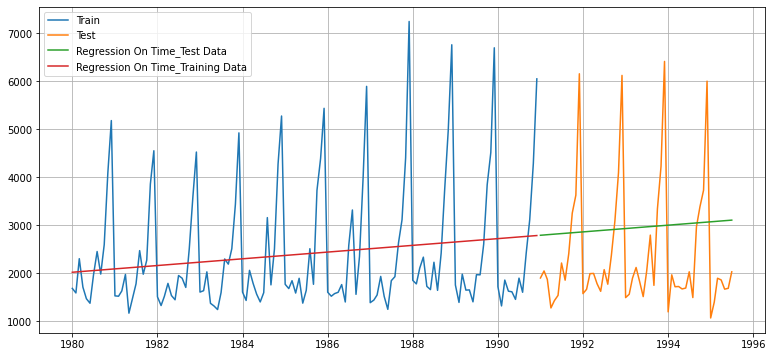

In [265]:
plt.figure(figsize=(13,6))
plt.plot( lr_train['Sales'], label='Train')
plt.plot(lr_test['Sales'], label='Test')
plt.plot(lr_test['Predict'], label='Regression On Time_Test Data')
plt.plot(lr_train['Predict'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [266]:
rmse,mape=calc_metrics(lr_train['Sales'],lr_train['Predict'])
resultsDf = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE': [mape]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1279.322346      40.05

## Method 2: Regression on Time With Seasonal Components

In [267]:
lr_mon_seasonality_train=pd.DataFrame(train.copy())
lr_mon_seasonality_test=pd.DataFrame(test.copy())
lr_mon_seasonality_train['Time']=train_time
lr_mon_seasonality_test['Time']=test_time

In [268]:
month_seasonality='m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12'.split()
mon='m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m1 m2 m3 m4 m5 m6 m7'
lr_mon_seasonality_train['MonthSeasonality']=month_seasonality*11
lr_mon_seasonality_test['MonthSeasonality']=mon.split()

In [269]:
lr_mon_seasonality_train=pd.get_dummies(lr_mon_seasonality_train,drop_first=True)
lr_mon_seasonality_test=pd.get_dummies(lr_mon_seasonality_test,drop_first=True)

In [270]:
x_train=lr_mon_seasonality_train.drop('Sales',axis=1)
y_train=lr_mon_seasonality_train.Sales
x_test=lr_mon_seasonality_test.drop('Sales',axis=1)
y_test=lr_mon_seasonality_test.Sales

lr_seas_model= LinearRegression()
lr_seas_model.fit(x_train, y_train)

LinearRegression()

In [271]:
lr_mon_seasonality_train['Predict']=lr_seas_model.predict(x_train)
lr_mon_seasonality_test['Predict']=lr_seas_model.predict(x_test)

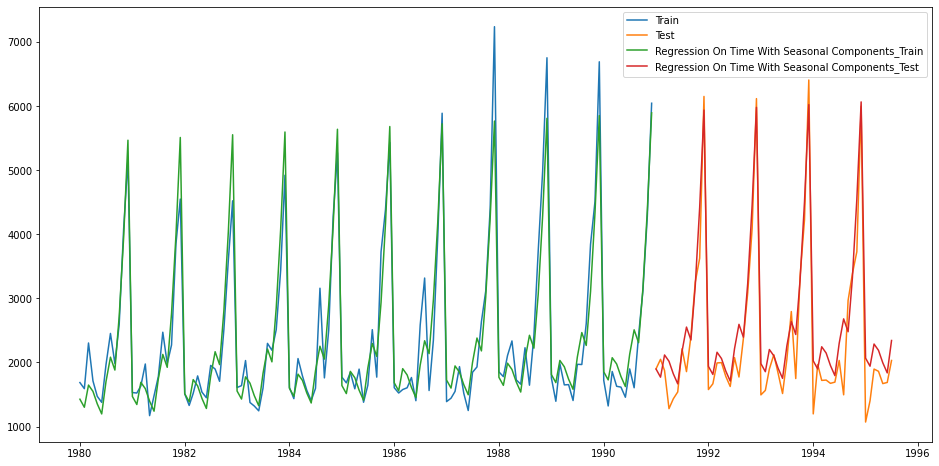

In [272]:
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(lr_mon_seasonality_train['Predict'], label='Regression On Time With Seasonal Components_Train')
plt.plot(lr_mon_seasonality_test['Predict'], label='Regression On Time With Seasonal Components_Test')
plt.legend(loc='best')

In [273]:
rmse,mape=calc_metrics(lr_mon_seasonality_test['Sales'],lr_mon_seasonality_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['RegressionOnTimeSeasonal'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29

## Method 3 : Naive Approach: ŷ t+1=y

In [274]:
naive_test=pd.DataFrame(test.copy())


In [275]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

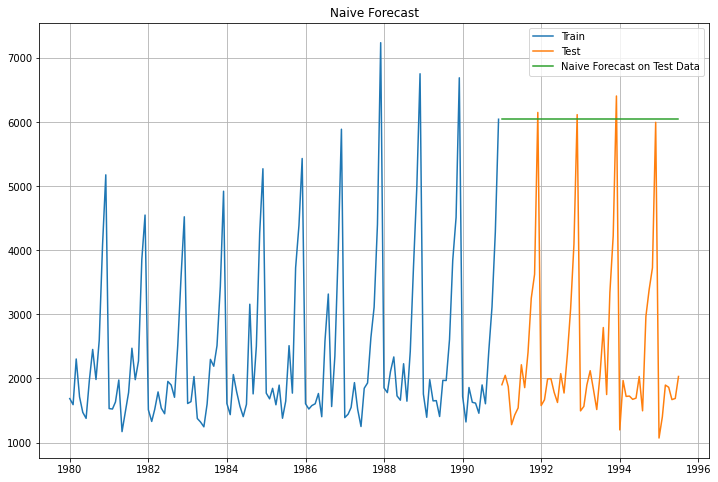

In [276]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [277]:
rmse,mape=calc_metrics(NaiveModel_test['Sales'] ,NaiveModel_test['naive'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Naive'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87

In [278]:
tempResultsDf

Test RMSE  Test MAPE
Naive  3864.279352     152.87

## Method 4 : Simple Average

In [279]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [280]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

Sales  mean_forecast
YearMonth                       
1991-01-01   1902    2403.780303
1991-02-01   2049    2403.780303
1991-03-01   1874    2403.780303
1991-04-01   1279    2403.780303
1991-05-01   1432    2403.780303

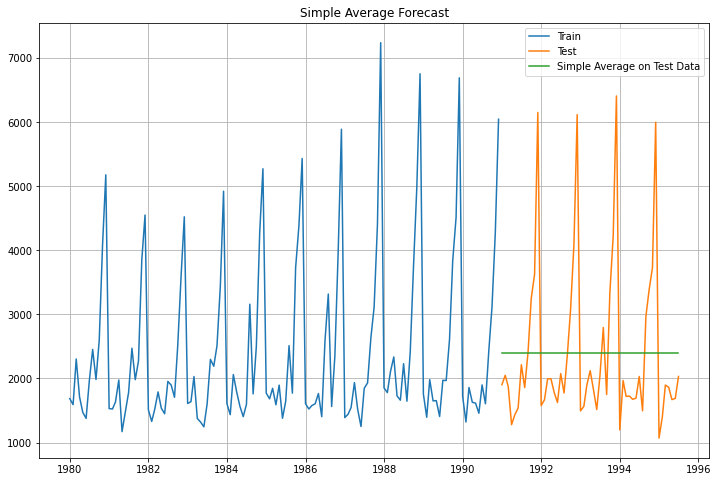

In [281]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [282]:
rmse,mape=calc_metrics(test['Sales'],SimpleAverage_test['mean_forecast'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['SimpleAvg'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87
SimpleAvg                 1275.081804      38.90

In [283]:
tempResultsDf

Test RMSE  Test MAPE
SimpleAvg  1275.081804       38.9

## Method 4: Moving Average(MA)

In [284]:
MovingAverage = sparkling.copy()
MovingAverage.head()

Sales
YearMonth        
1980-01-01   1686
1980-02-01   1591
1980-03-01   2304
1980-04-01   1712
1980-05-01   1471

In [285]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_3'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.tail()

Sales  Trailing_2  Trailing_3   Trailing_6   Trailing_9
YearMonth                                                          
1995-03-01   1897      1649.5     2592.00  2913.666667  2664.000000
1995-04-01   1862      1879.5     1557.75  2659.833333  2645.222222
1995-05-01   1670      1766.0     1707.75  2316.666667  2664.666667
1995-06-01   1688      1679.0     1779.25  1598.166667  2522.444444
1995-07-01   2031      1859.5     1812.75  1758.333333  2372.000000

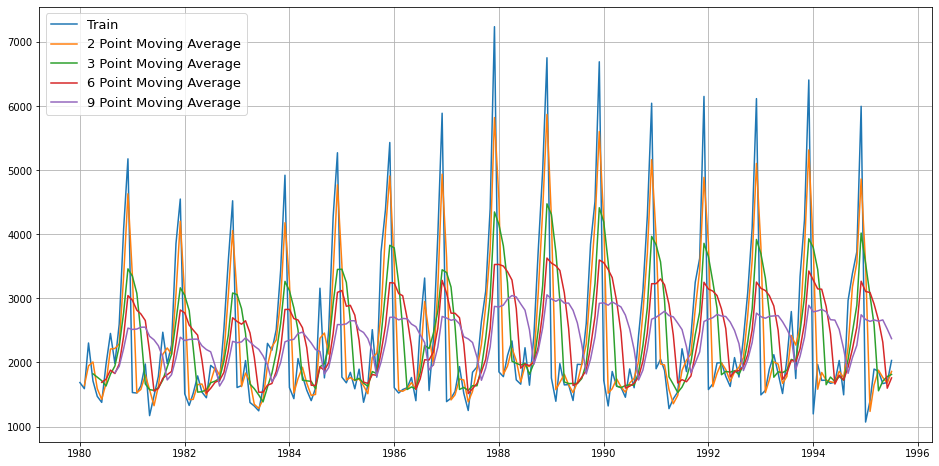

In [286]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best',fontsize=13)
plt.grid();

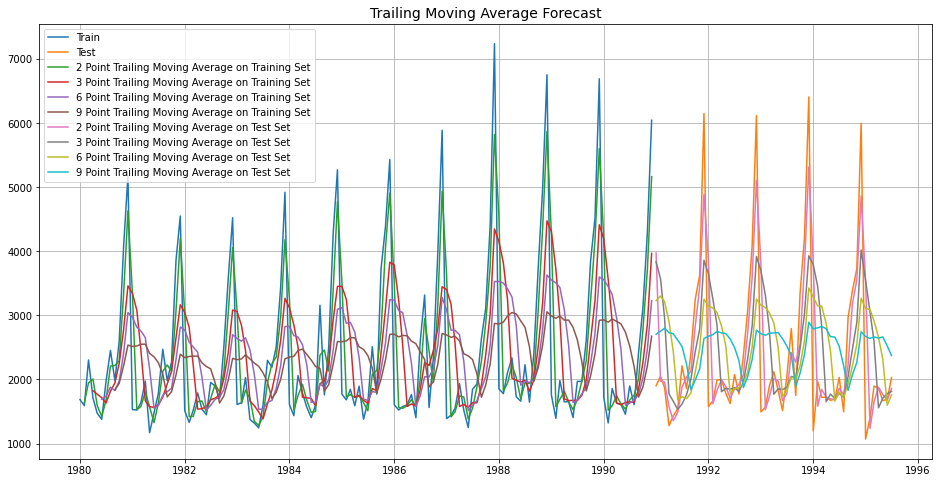

In [287]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year<1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year>1990]

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title('Trailing Moving Average Forecast',fontsize=14)
plt.legend(loc = 'best')
plt.grid();

In [288]:
rmse,mape=calc_metrics(trailing_MovingAverage_test['Sales'],trailing_MovingAverage_test['Trailing_2'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Trailing_MA_2'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87
SimpleAvg                 1275.081804      38.90
Trailing_MA_2              813.400684      19.70

In [289]:
rmse,mape=calc_metrics(trailing_MovingAverage_test['Sales'],trailing_MovingAverage_test['Trailing_3'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Trailing_MA_3'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87
SimpleAvg                 1275.081804      38.90
Trailing_MA_2              813.400684      19.70
Trailing_MA_3             1156.589694      35.96

In [290]:
rmse,mape=calc_metrics(trailing_MovingAverage_test['Sales'],trailing_MovingAverage_test['Trailing_6'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Trailing_MA_6'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87
SimpleAvg                 1275.081804      38.90
Trailing_MA_2              813.400684      19.70
Trailing_MA_3             1156.589694      35.96
Trailing_MA_6             1283.927428      43.86

In [291]:
rmse,mape=calc_metrics(trailing_MovingAverage_test['Sales'],trailing_MovingAverage_test['Trailing_9'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Trailing_MA_9'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87
SimpleAvg                 1275.081804      38.90
Trailing_MA_2              813.400684      19.70
Trailing_MA_3             1156.589694      35.96
Trailing_MA_6             1283.927428      43.86
Trailing_MA_9             1346.278315      46.86

In [292]:
tempResultsDf

Test RMSE  Test MAPE
Trailing_MA_9  1346.278315      46.86

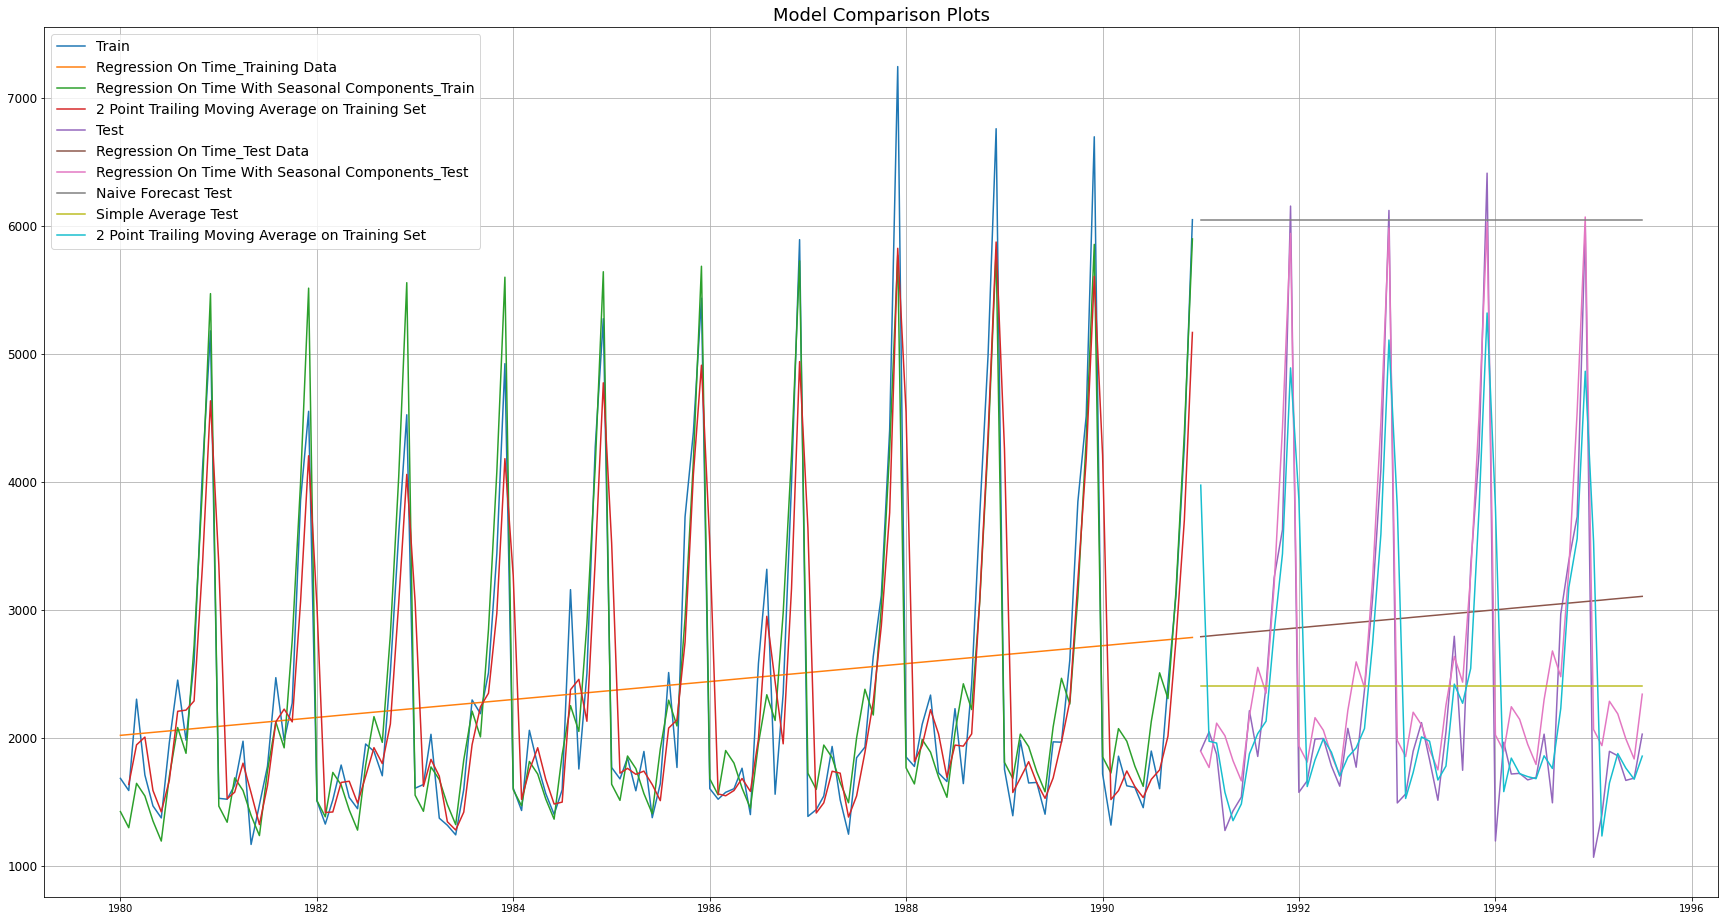

In [293]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,16))
plt.plot(train, label='Train')


plt.plot(lr_train['Predict'], label='Regression On Time_Training Data')
plt.plot(lr_mon_seasonality_train['Predict'], label='Regression On Time With Seasonal Components_Train')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(test, label='Test')

plt.plot(lr_test['Predict'], label='Regression On Time_Test Data')
plt.plot(lr_mon_seasonality_test['Predict'], label='Regression On Time With Seasonal Components_Test')
plt.plot(naive_test.index,NaiveModel_test['naive'], label='Naive Forecast Test')
plt.plot(SimpleAverage_test.index,SimpleAverage_test['mean_forecast'], label='Simple Average Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.legend(loc='best',fontsize=14)
plt.title("Model Comparison Plots",fontsize=18)
plt.yticks(fontsize=12)
plt.grid();

## Simple Exponential Smoothing

In [294]:
SES_train = pd.DataFrame(train.copy())
SES_test = pd.DataFrame(test.copy())

In [295]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [296]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [297]:
model_SES_autofit.params

{'damping_slope': nan,
 'initial_level': 2403.7828696439005,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.0,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [298]:
SES_train['Predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Sales     Predict
YearMonth                    
1980-01-01   1686  2403.78287
1980-02-01   1591  2403.78287
1980-03-01   2304  2403.78287
1980-04-01   1712  2403.78287
1980-05-01   1471  2403.78287

In [299]:
SES_test['Predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

Sales     Predict
YearMonth                    
1991-01-01   1902  2403.78287
1991-02-01   2049  2403.78287
1991-03-01   1874  2403.78287
1991-04-01   1279  2403.78287
1991-05-01   1432  2403.78287

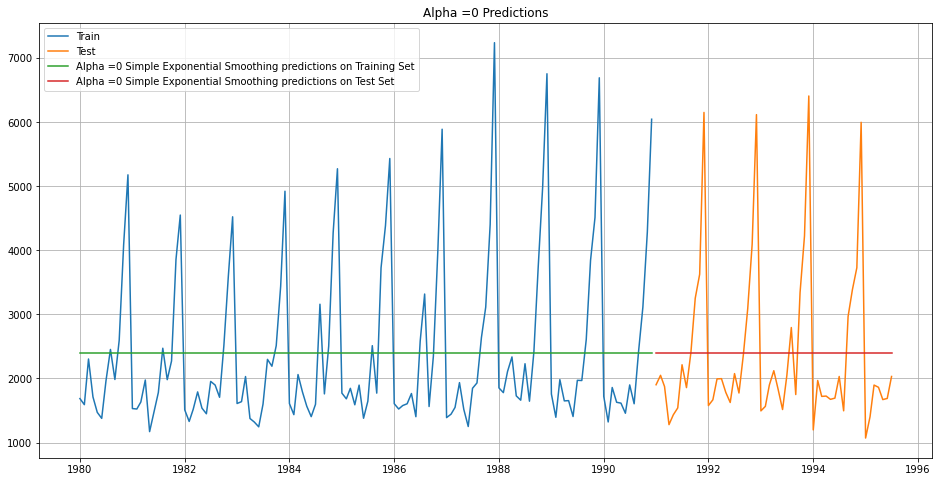

In [300]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_train['Predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['Predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0 Predictions');

In [301]:
rmse,mape=calc_metrics(SES_test['Sales'],SES_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['SES Alpha=0'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87
SimpleAvg                 1275.081804      38.90
Trailing_MA_2              813.400684      19.70
Trailing_MA_3             1156.589694      35.96
Trailing_MA_6             1283.927428      43.86
Trailing_MA_9             1346.278315      46.86
SES Alpha=0               1275.081813      38.90

In [302]:
tempResultsDf

Test RMSE  Test MAPE
SES Alpha=0  1275.081813       38.9

In [303]:
resultsDf_SES = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_SES

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [304]:
for i in np.arange(0,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['Predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['Predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['Predict',i],squared=False)
    mape_SES_train_i = MAPE(SES_train['Sales'],SES_train['Predict',i])
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['Predict',i],squared=False)
    mape_SES_test_i = MAPE(SES_test['Sales'],SES_test['Predict',i])
    
    resultsDf_SES = resultsDf_SES.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i 
                                      ,'Train MAPE': mape_SES_train_i,'Test RMSE':rmse_SES_test_i
                                      ,'Test MAPE':mape_SES_test_i}, ignore_index=True)

In [115]:
resultsDf_SES.sort_values('Test RMSE')

Alpha Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0           0.0  1298.483628       40.36  1275.081846      38.90
1           0.1  1331.786996       42.30  1375.393526      49.53
2           0.2  1355.645334       43.91  1595.206839      60.46
3           0.3  1359.422162       43.80  1935.507132      75.66
4           0.4  1352.562367       42.79  2311.919615      91.55
5           0.5  1343.994119       41.18  2666.351413     106.27
6           0.6  1338.801428       39.81  2979.204388     118.77
7           0.7  1338.843298       38.56  3249.944092     129.34
8           0.8  1344.462035       37.60  3483.801006     138.34
9           0.9  1355.723493       36.79  3686.794285     146.08

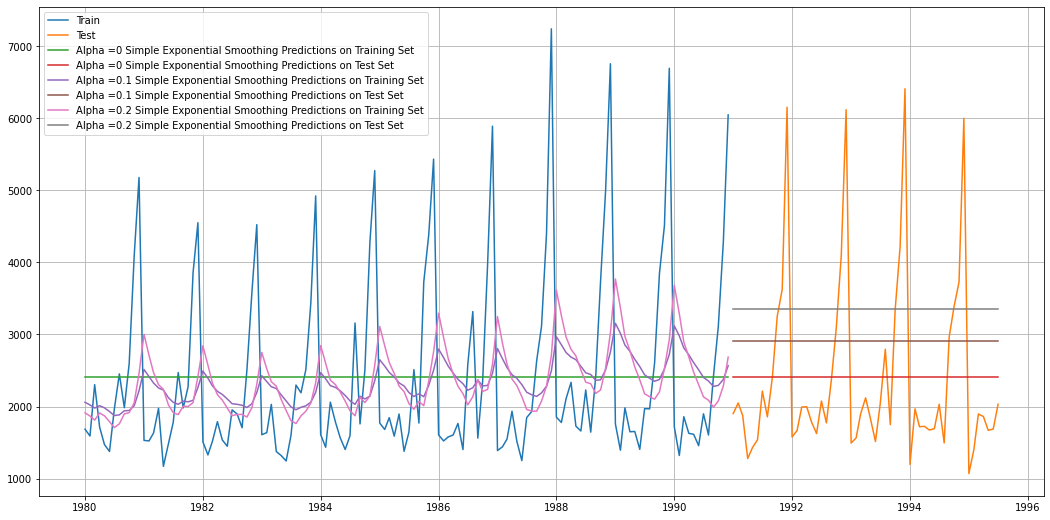

In [116]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_train['Predict'], label='Alpha =0 Simple Exponential Smoothing Predictions on Training Set')
plt.plot(SES_test['Predict'], label='Alpha =0 Simple Exponential Smoothing Predictions on Test Set')

plt.plot(SES_train['Predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing Predictions on Training Set')
plt.plot(SES_test['Predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing Predictions on Test Set')

plt.plot(SES_train['Predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing Predictions on Training Set')
plt.plot(SES_test['Predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing Predictions on Test Set')


plt.legend(loc='best')
plt.grid();

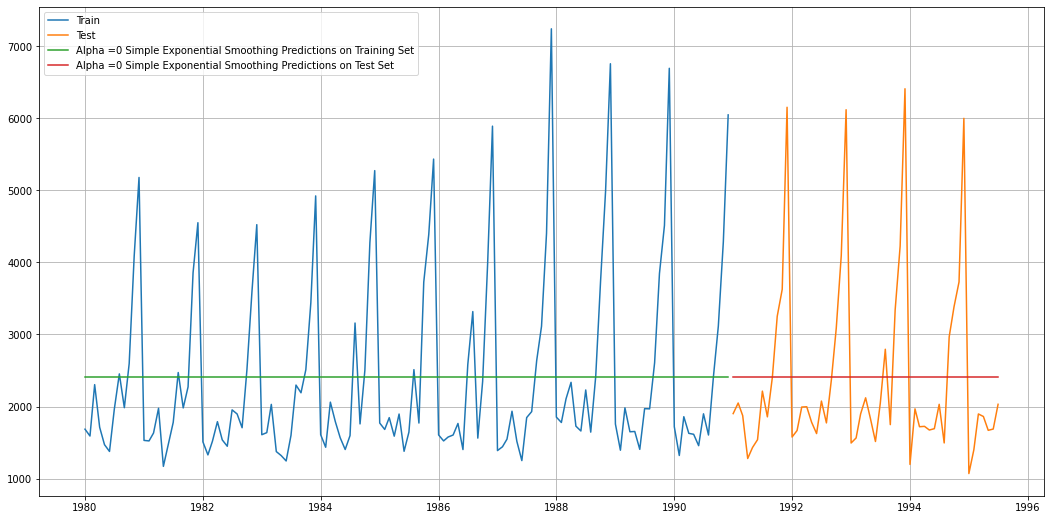

In [117]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_train['Predict'], label='Alpha =0 Simple Exponential Smoothing Predictions on Training Set')
plt.plot(SES_test['Predict'], label='Alpha =0 Simple Exponential Smoothing Predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [118]:
resultsDf_SES_1 = pd.DataFrame({'Test RMSE': [resultsDf_SES['Test RMSE'][0],resultsDf_SES['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_SES['Test MAPE'][0],resultsDf_SES['Test MAPE'][1]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing','Alpha=0.2,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_SES_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                      1279.322346      40.05
RegressionOnTimeSeasonal               420.866517      13.29
Naive                                 3864.279352     152.87
SimpleAvg                             1275.081804      38.90
Trailing_MA_2                          813.400684      19.70
Trailing_MA_3                         1156.589694      35.96
Trailing_MA_6                         1283.927428      43.86
Trailing_MA_9                         1346.278315      46.86
SES Alpha=0                           1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing  1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing  1375.393526      49.53

## Double Exponential Smoothing (Holt's Model, Holt's Linear Trend Method)

In [119]:
DES_train = pd.DataFrame(train.copy())
DES_test = pd.DataFrame(test.copy())

In [120]:
model_DES = Holt(DES_train['Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [121]:
model_DES_auto_fit=model_DES.fit(optimized=True,use_brute=True)

In [122]:
model_DES_auto_fit.params

{'damping_slope': nan,
 'initial_level': 1686.0825794906987,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 27.05013613663255,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.6478144580517214,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.0,
 'use_boxcox': False}

In [123]:
resultsDf_DES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_DES

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [124]:
DES_train['Predict']=model_DES_auto_fit.fittedvalues
DES_test['Predict']=model_DES_auto_fit.forecast(steps=55)

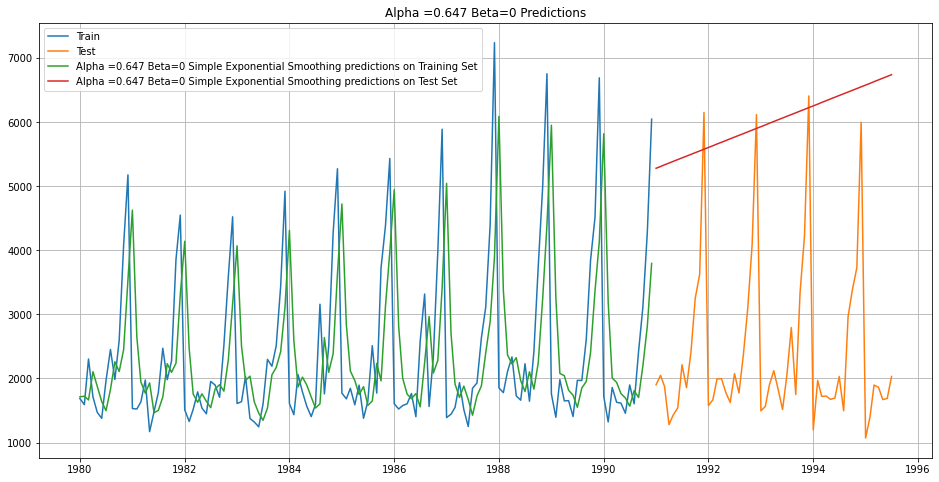

In [125]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_train['Predict'], label='Alpha =0.647 Beta=0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(DES_test['Predict'], label='Alpha =0.647 Beta=0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.647 Beta=0 Predictions');

In [126]:
rmse,mape=calc_metrics(DES_test['Sales'],DES_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['DES Alpha=0.647,Beta=0'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                      1279.322346      40.05
RegressionOnTimeSeasonal               420.866517      13.29
Naive                                 3864.279352     152.87
SimpleAvg                             1275.081804      38.90
Trailing_MA_2                          813.400684      19.70
Trailing_MA_3                         1156.589694      35.96
Trailing_MA_6                         1283.927428      43.86
Trailing_MA_9                         1346.278315      46.86
SES Alpha=0                           1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing  1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing  1375.393526      49.53
DES Alpha=0.647,Beta=0                3850.779835     152.05

In [127]:
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_DES_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        mape_DES_train = MAPE(DES_train['Sales'],DES_train['predict',i,j])
        
        rmse_DES_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        mape_DES_test = MAPE(DES_test['Sales'],DES_test['predict',i,j])
        
        resultsDf_DES = resultsDf_DES.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                      ,'Train MAPE': mape_DES_train,'Test RMSE':rmse_DES_test
                                      ,'Test MAPE':mape_DES_test}, ignore_index=True)

In [128]:
resultsDf_DES

Alpha Values  Beta Values  ...     Test RMSE  Test MAPE
0             0.0          0.0  ...   1460.954675      34.41
1             0.0          0.1  ...   1460.954675      34.41
2             0.0          0.2  ...   1460.954675      34.41
3             0.0          0.3  ...   1460.954675      34.41
4             0.0          0.4  ...   1460.954675      34.41
..            ...          ...  ...           ...        ...
116           1.0          0.6  ...  49327.087977    1824.42
117           1.0          0.7  ...  52655.765663    1945.23
118           1.0          0.8  ...  55442.273880    2046.36
119           1.0          0.9  ...  57823.177011    2132.75
120           1.0          1.0  ...  59877.076519    2207.28

[121 rows x 6 columns]

In [129]:
resultsDf_DES.sort_values(by=['Test RMSE']).head(15)

Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0            0.0          0.0  1483.667178       35.55  1460.954675      34.41
1            0.0          0.1  1483.667178       35.55  1460.954675      34.41
2            0.0          0.2  1483.667178       35.55  1460.954675      34.41
3            0.0          0.3  1483.667178       35.55  1460.954675      34.41
4            0.0          0.4  1483.667178       35.55  1460.954675      34.41
5            0.0          0.5  1483.667178       35.55  1460.954675      34.41
6            0.0          0.6  1483.667178       35.55  1460.954675      34.41
7            0.0          0.7  1483.667178       35.55  1460.954675      34.41
8            0.0          0.8  1483.667178       35.55  1460.954675      34.41
9            0.0          0.9  1483.667178       35.55  1460.954675      34.41
10           0.0          1.0  1483.667178       35.55  1460.954675      34.41
11           0.1          0.0  1329.944536       43.08  1504.684316      55.99
12           0.1          0.1  1363.474031       44.26  1779.426896      67.23
22           0.2          0.0  1354.458399       44.48  1851.305010      71.66
33           0.3          0.0  1358.400672       44.10  2336.563711      91.99

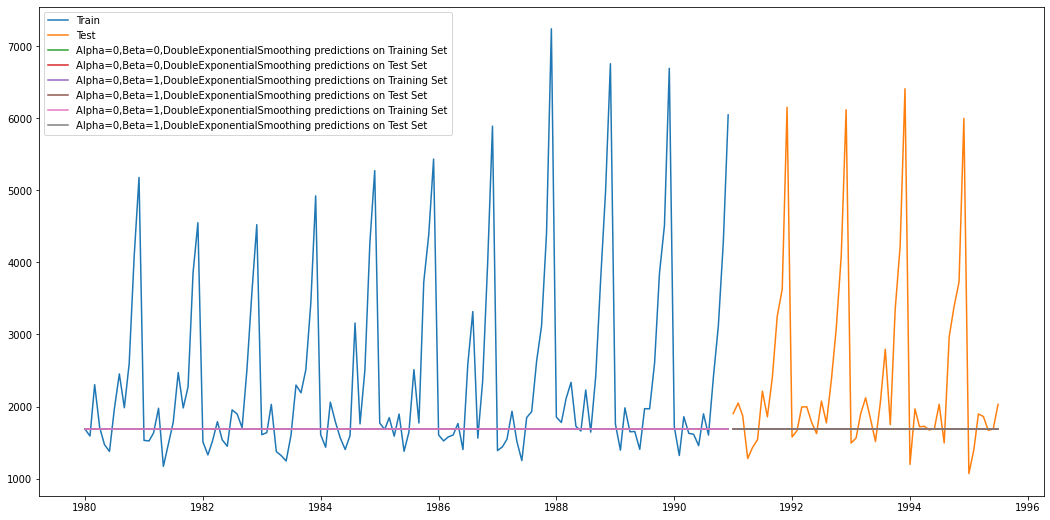

In [130]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_train['predict', 0, 0], label='Alpha=0,Beta=0,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0, 0], label='Alpha=0,Beta=0,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(DES_train['predict', 0, 1.0], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0, 1.0], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(DES_train['predict', 0, 0.5], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0, 0.5], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')

Text(0.5, 1.0, 'Comparision of DES Models')

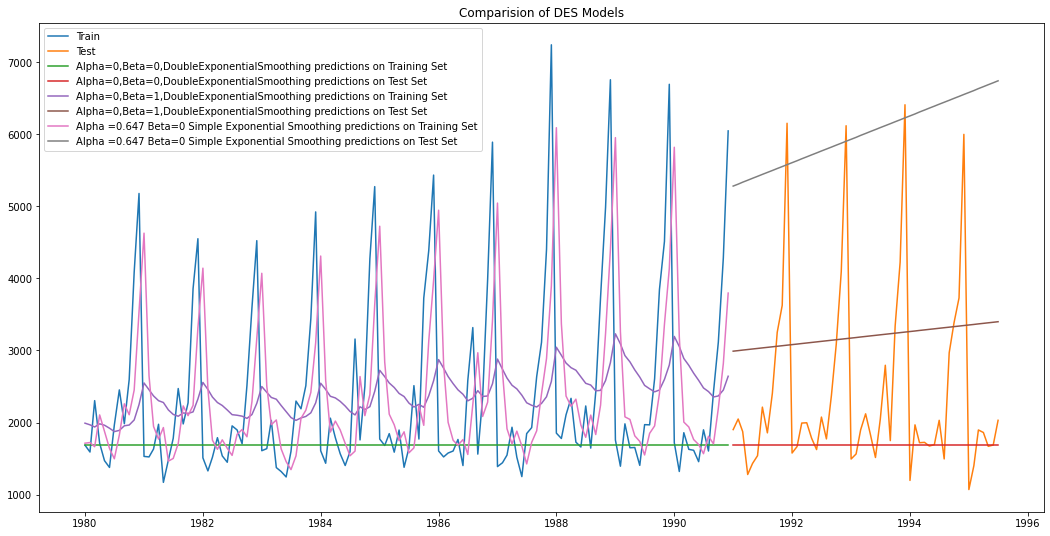

In [131]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_train['predict', 0, 0], label='Alpha=0,Beta=0,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0, 0], label='Alpha=0,Beta=0,DoubleExponentialSmoothing predictions on Test Set')



plt.plot(DES_train['predict', 0.1, 0], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(DES_train['Predict'], label='Alpha =0.647 Beta=0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(DES_test['Predict'], label='Alpha =0.647 Beta=0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Comparision of DES Models')

Text(0.5, 1.0, 'Comparision of DES Models')

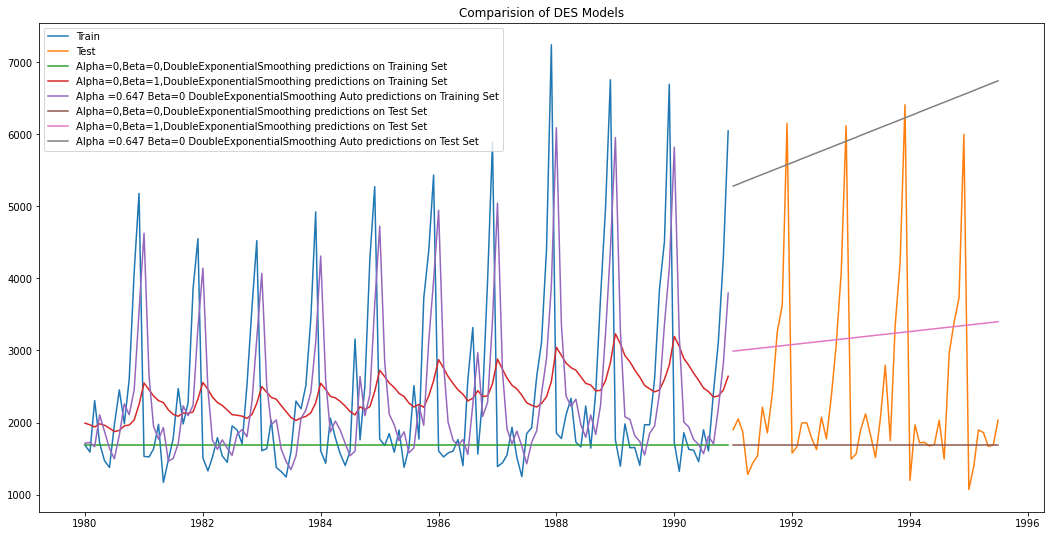

In [132]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_train['predict', 0, 0], label='Alpha=0,Beta=0,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_train['predict', 0.1, 0], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_train['Predict'], label='Alpha =0.647 Beta=0 DoubleExponentialSmoothing Auto predictions on Training Set')


plt.plot(DES_test['predict', 0, 0], label='Alpha=0,Beta=0,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.1, 0], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(DES_test['Predict'], label='Alpha =0.647 Beta=0 DoubleExponentialSmoothing Auto predictions on Test Set')

plt.legend(loc='best')
plt.title('Comparision of DES Models')



In [133]:
resultsDf_DES_1 = pd.DataFrame({'Test RMSE': [resultsDf_DES['Test RMSE'][0]],'Test MAPE':[resultsDf_DES['Test MAPE'][0]]}
                           ,index=['Alpha=0,Beta=0,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_DES_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                           1279.322346      40.05
RegressionOnTimeSeasonal                    420.866517      13.29
Naive                                      3864.279352     152.87
SimpleAvg                                  1275.081804      38.90
Trailing_MA_2                               813.400684      19.70
Trailing_MA_3                              1156.589694      35.96
Trailing_MA_6                              1283.927428      43.86
Trailing_MA_9                              1346.278315      46.86
SES Alpha=0                                1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing       1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing       1375.393526      49.53
DES Alpha=0.647,Beta=0                     3850.779835     152.05
Alpha=0,Beta=0,DoubleExponentialSmoothing  1460.954675      34.41

## Triple Exponential Smoothing (Holt - Winter's Model)

In [134]:
TES_train = pd.DataFrame(train.copy())
TES_test = pd.DataFrame(test.copy())

In [135]:
TES_train = pd.DataFrame(train.copy())
TES_test = pd.DataFrame(test.copy())

In [136]:
model_TES = ExponentialSmoothing(TES_train['Sales'],seasonal_periods = 12 ,trend='additive',seasonal='additive')
model_TES_autofit = model_TES.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [137]:
model_TES_autofit.params

{'damping_slope': nan,
 'initial_level': 1685.012792659747,
 'initial_seasons': array([  38.53437848,  -37.58205472,  464.84418171,  205.8317736 ,
        -140.67468508, -156.94463912,  338.18645503,  856.3663037 ,
         402.95623136,  971.15074363, 2401.43787839, 3426.35728898]),
 'initial_slope': 1.9144384621230306e-09,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.08622068066400991,
 'smoothing_seasonal': 0.47641579236437037,
 'smoothing_slope': 1.0548986177830093e-09,
 'use_boxcox': False}

In [138]:
TES_train['Predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sales      Predict
YearMonth                     
1980-01-01   1686  1723.547171
1980-02-01   1591  1644.193395
1980-03-01   2304  2142.033261
1980-04-01   1712  1896.985735
1980-05-01   1471  1534.529681

In [139]:
## Prediction on the test data

TES_test['Predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

Sales      Predict
YearMonth                     
1991-01-01   1902  1532.364557
1991-02-01   2049  1241.299611
1991-03-01   1874  1726.710821
1991-04-01   1279  1584.229829
1991-05-01   1432  1493.939460

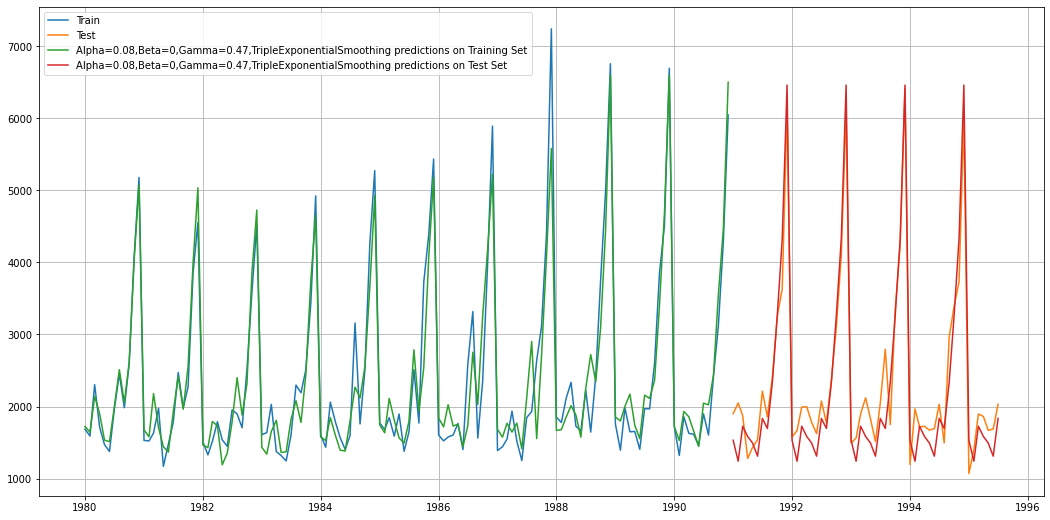

In [140]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

plt.plot(TES_train['Predict'], label='Alpha=0.08,Beta=0,Gamma=0.47,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['Predict'], label='Alpha=0.08,Beta=0,Gamma=0.47,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [141]:
rmse,mape=calc_metrics(TES_test['Sales'],TES_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Triple Exponential Smoothing Alpha=0.08,Beta=0,Gamma=0.47'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1279.322346      40.05
RegressionOnTimeSeasonal                             420.866517      13.29
Naive                                               3864.279352     152.87
SimpleAvg                                           1275.081804      38.90
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
SES Alpha=0                                         1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing                1375.393526      49.53
DES Alpha=0.647,Beta=0                              3850.779835     152.05
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.806115      12.08

In [142]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_TES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_TES

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [143]:
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0.0,0.1,0.1):
        for k in np.arange(0,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_TES_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict',i,j,k],squared=False)
            mape_TES_train = MAPE(TES_train['Sales'],TES_train['predict',i,j,k])
        
            rmse_TES_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict',i,j,k],squared=False)
            mape_TES_test = MAPE(TES_test['Sales'],TES_test['predict',i,j,k])
        
            resultsDf_TES = resultsDf_TES.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_TES_train
                                      ,'Train MAPE': mape_TES_train,'Test RMSE':rmse_TES_test
                                      ,'Test MAPE':mape_TES_test}, ignore_index=True)

In [144]:
resultsDf_TES

Alpha Values  Beta Values  Gamma Values  ...  Train MAPE   Test RMSE  Test MAPE
0             0.0          0.0           0.0  ...       12.95  479.738035      16.11
1             0.0          0.0           0.1  ...       11.88  354.048802      12.05
2             0.0          0.0           0.2  ...       11.13  306.663375       9.82
3             0.0          0.0           0.3  ...       11.03  309.601501       9.60
4             0.0          0.0           0.4  ...       11.00  328.440865       9.97
..            ...          ...           ...  ...         ...         ...        ...
116           1.0          0.0           0.6  ...       16.75  551.774845      16.71
117           1.0          0.0           0.7  ...       18.32  582.623954      18.59
118           1.0          0.0           0.8  ...       20.40  657.372584      20.76
119           1.0          0.0           0.9  ...       23.94  796.736952      24.20
120           1.0          0.0           1.0  ...       30.55  995.427272      29.55

[121 rows x 7 columns]

In [145]:
resultsDf_TES.sort_values('Test MAPE')

Alpha Values  Beta Values  ...    Test RMSE  Test MAPE
3             0.0          0.0  ...   309.601501       9.60
46            0.4          0.0  ...   315.945653       9.63
13            0.1          0.0  ...   305.809982       9.72
57            0.5          0.0  ...   322.669134       9.79
2             0.0          0.0  ...   306.663375       9.82
..            ...          ...  ...          ...        ...
110           1.0          0.0  ...   887.233699      32.46
65            0.5          0.0  ...   875.541786      32.90
75            0.6          0.0  ...   887.490488      33.24
87            0.7          0.0  ...   955.529273      36.61
76            0.6          0.0  ...  1015.541743      38.36

[121 rows x 7 columns]

In [146]:
resultsDf_TES.sort_values('Test RMSE')

Alpha Values  Beta Values  ...    Test RMSE  Test MAPE
13            0.1          0.0  ...   305.809982       9.72
2             0.0          0.0  ...   306.663375       9.82
3             0.0          0.0  ...   309.601501       9.60
46            0.4          0.0  ...   315.945653       9.63
24            0.2          0.0  ...   316.811106      10.49
..            ...          ...  ...          ...        ...
110           1.0          0.0  ...   887.233699      32.46
75            0.6          0.0  ...   887.490488      33.24
87            0.7          0.0  ...   955.529273      36.61
120           1.0          0.0  ...   995.427272      29.55
76            0.6          0.0  ...  1015.541743      38.36

[121 rows x 7 columns]

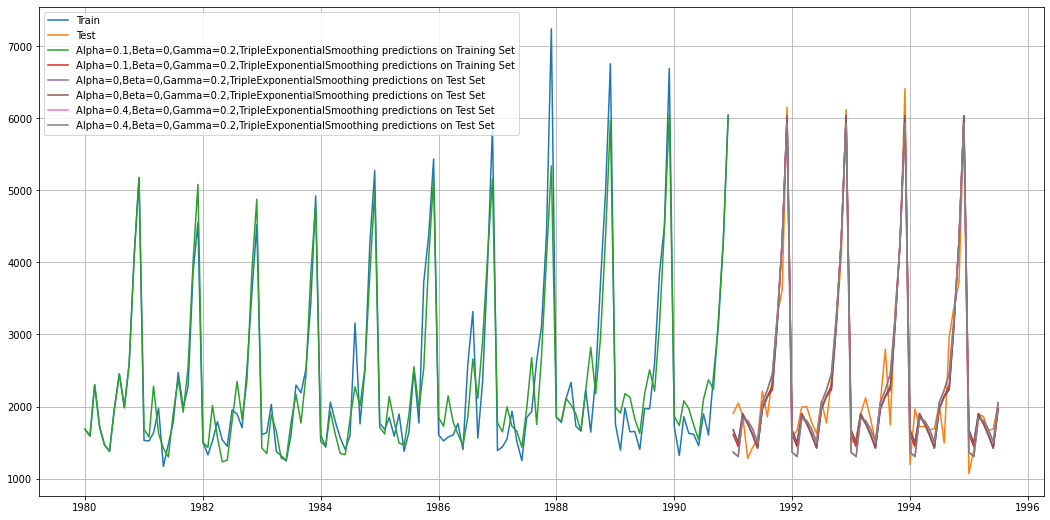

In [147]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

plt.plot(TES_train['predict', 0.1, 0.0, 0.2], label='Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.1, 0.0, 0.2], label='Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')

plt.plot(TES_test['predict', 0.0, 0.0, 0.2], label='Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.0, 0.0, 0.2], label='Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.4, 0.0, 0.2], label='Alpha=0.4,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.4, 0.0, 0.2], label='Alpha=0.4,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

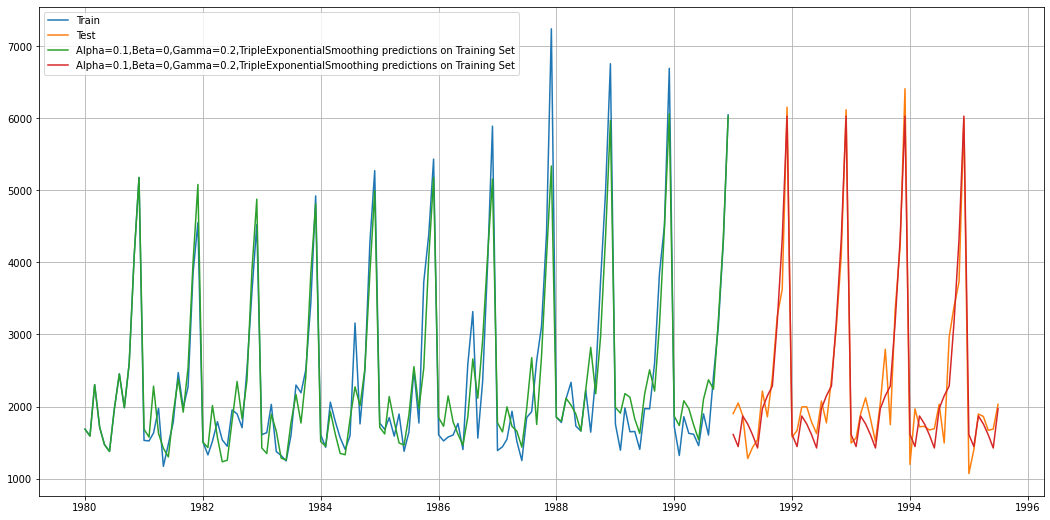

In [148]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

plt.plot(TES_train['predict', 0.1, 0.0, 0.2], label='Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.1, 0.0, 0.2], label='Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')


plt.legend(loc='best')
plt.grid();

In [149]:
resultsDf_TES=resultsDf_TES.sort_values('Test RMSE')
resultsDf_TES

Alpha Values  Beta Values  ...    Test RMSE  Test MAPE
13            0.1          0.0  ...   305.809982       9.72
2             0.0          0.0  ...   306.663375       9.82
3             0.0          0.0  ...   309.601501       9.60
46            0.4          0.0  ...   315.945653       9.63
24            0.2          0.0  ...   316.811106      10.49
..            ...          ...  ...          ...        ...
110           1.0          0.0  ...   887.233699      32.46
75            0.6          0.0  ...   887.490488      33.24
87            0.7          0.0  ...   955.529273      36.61
120           1.0          0.0  ...   995.427272      29.55
76            0.6          0.0  ...  1015.541743      38.36

[121 rows x 7 columns]

In [150]:
resultsDf_TES_1 = pd.DataFrame({'Test RMSE': [resultsDf_TES['Test RMSE'][13],resultsDf_TES['Test RMSE'][2],resultsDf_TES['Test RMSE'][3]],
                                'Test MAPE':[resultsDf_TES['Test MAPE'][13],resultsDf_TES['Test MAPE'][2],resultsDf_TES['Test MAPE'][3]]}
                           ,index=['Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmoothing','Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoothing','Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_TES_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1279.322346      40.05
RegressionOnTimeSeasonal                             420.866517      13.29
Naive                                               3864.279352     152.87
SimpleAvg                                           1275.081804      38.90
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
SES Alpha=0                                         1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing                1375.393526      49.53
DES Alpha=0.647,Beta=0                              3850.779835     152.05
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.806115      12.08
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60

In [151]:
resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAPE
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.806115      12.08
RegressionOnTimeSeasonal                             420.866517      13.29
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
SimpleAvg                                           1275.081804      38.90
SES Alpha=0                                         1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
RegressionOnTime                                    1279.322346      40.05
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
Alpha=0.2,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
DES Alpha=0.647,Beta=0                              3850.779835     152.05
Naive                                               3864.279352     152.87

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [152]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean()
    rolstd = timeseries.rolling(window=5).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

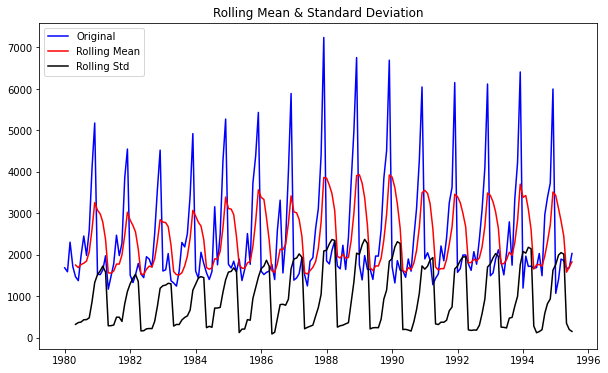

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [153]:
test_stationarity(sparkling['Sales'])

In [154]:
## We see that at 5% significant level the Time Series is non-stationary.

## Let us take a difference of order 1 and check whether the Time Series is stationary or not.

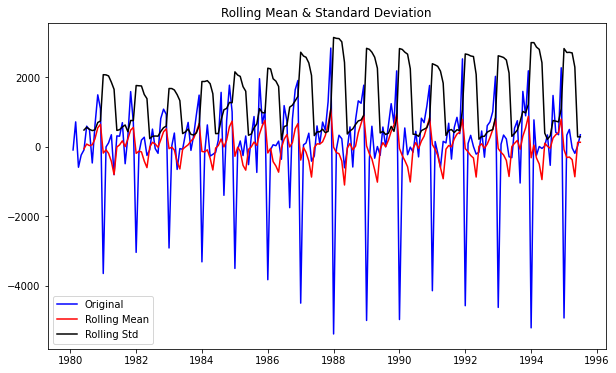

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [155]:
test_stationarity(sparkling['Sales'].diff().dropna())

In [156]:
#We see that at α= 0.05 the Time Series is indeed stationary.

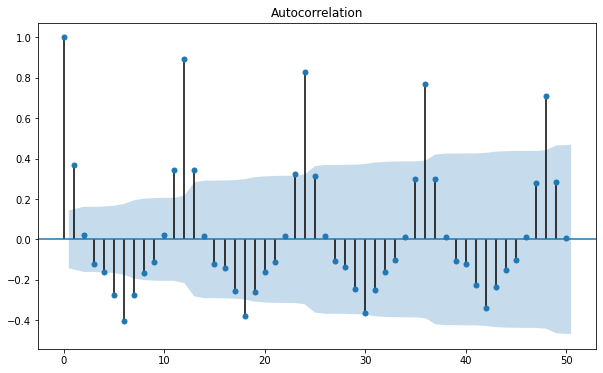

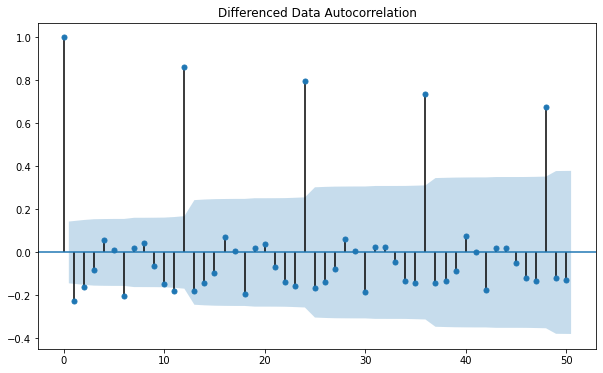

In [157]:
plot_acf(sparkling['Sales'],lags=50)
plot_acf(sparkling['Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


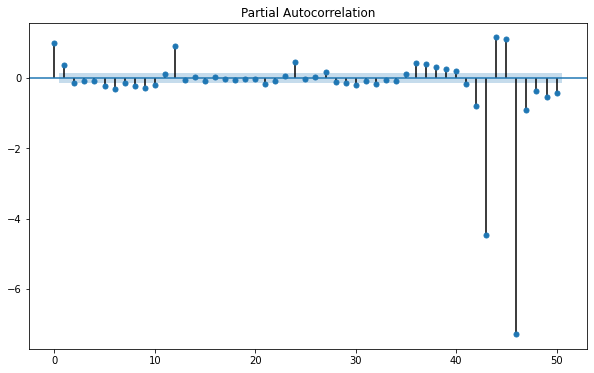

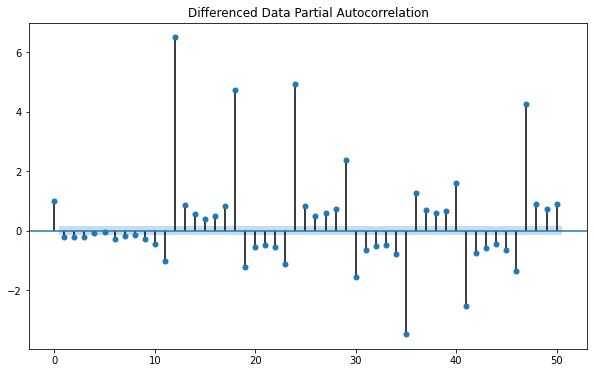

In [158]:
plot_pacf(sparkling['Sales'],lags=50)
plot_pacf(sparkling['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [159]:
ARIMA_train=sparkling[sparkling.index.year<1991]
ARIMA_test=sparkling[sparkling.index.year>1990]

In [160]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sales
YearMonth        
1980-01-01   1686
1980-02-01   1591
1980-03-01   2304
1980-04-01   1712
1980-05-01   1471

Last few rows of Training Data


Sales
YearMonth        
1990-08-01   1605
1990-09-01   2424
1990-10-01   3116
1990-11-01   4286
1990-12-01   6047

First few rows of Test Data


Sales
YearMonth        
1991-01-01   1902
1991-02-01   2049
1991-03-01   1874
1991-04-01   1279
1991-05-01   1432

Last few rows of Test Data


Sales
YearMonth        
1995-03-01   1897
1995-04-01   1862
1995-05-01   1670
1995-06-01   1688
1995-07-01   2031

In [161]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [162]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [163]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'],order=param,freq='MS').fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906436793315
ARIMA(0, 1, 2) - AIC:2232.783097684156
ARIMA(1, 1, 0) - AIC:2268.5280608424086
ARIMA(1, 1, 1) - AIC:2235.0139453505435
ARIMA(1, 1, 2) - AIC:2233.5976471194977
ARIMA(2, 1, 0) - AIC:2262.0356000662723
ARIMA(2, 1, 1) - AIC:2232.3604898821764
ARIMA(2, 1, 2) - AIC:2210.6175078805536


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [164]:
ARIMA_AIC

param          AIC
0  (0, 1, 0)  2269.582796
1  (0, 1, 1)  2264.906437
2  (0, 1, 2)  2232.783098
3  (1, 1, 0)  2268.528061
4  (1, 1, 1)  2235.013945
5  (1, 1, 2)  2233.597647
6  (2, 1, 0)  2262.035600
7  (2, 1, 1)  2232.360490
8  (2, 1, 2)  2210.617508

In [165]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.617508
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906437
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [166]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,2),freq='MS')
results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.577
Date:                Sun, 19 Dec 2021   AIC                           2210.618
Time:                        15:30:35   BIC                           2227.869
Sample:                    02-01-1980   HQIC                          2217.627
                         - 12-01-1990                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.5859      0.516     10.820      0.000       4.574       6.598
ar.L1.D.Sales     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sales    -0.5601      0.074     

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [167]:
pred_ARIMA=results_auto_ARIMA.forecast(steps=len(ARIMA_test))

In [168]:
ARIMA_train['Predicted']=results_auto_ARIMA.fittedvalues
ARIMA_test_result=results_auto_ARIMA.forecast(steps=len(ARIMA_test))
ARIMA_test['Predicted'] = ARIMA_test_result[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [169]:
rmse,mape=calc_metrics(test.Sales,pred_ARIMA[0])
tempDf = pd.DataFrame({'Test RMSE': [rmse],
                                'Test MAPE':[mape]}
                           ,index=['Auto ARIMA (2,1,2)'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1279.322346      40.05
RegressionOnTimeSeasonal                             420.866517      13.29
Naive                                               3864.279352     152.87
SimpleAvg                                           1275.081804      38.90
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
SES Alpha=0                                         1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing                1375.393526      49.53
DES Alpha=0.647,Beta=0                              3850.779835     152.05
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.806115      12.08
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Auto ARIMA (2,1,2)                                  1374.696495      48.37

In [170]:
SARIMA_train=sparkling[sparkling.index.year<1991]
SARIMA_test=sparkling[sparkling.index.year>1990]

In [171]:

SARIMA_result_df = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_result_df

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [172]:

SARIMA_result_df_1 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_result_df_1

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [173]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D=range(0,2)
pdq = list(itertools.product(p, d, q))

PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [174]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in PDQ:
        mod = sm.tsa.statespace.SARIMAX(SARIMA_train['Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,freq='MS')
            
        SARIMA_model_result = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, SARIMA_model_result.aic))
        SARIMA_result_df_1 = SARIMA_result_df.append({'param':param,'seasonal':param_seasonal ,'AIC': SARIMA_model_result.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1956.261461684482
SARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:1723.1533640239436
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1626.8626334678538
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:1452.677357425467
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1806.990530138944
SARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:1633.2108735791433
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1628.32439081851
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:1454.528962130823
SARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:1647.2054158597898
SARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:1630.9898053920817
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:1468.5000981866626
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:1570.4151111597193
SARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:1428.2448811162574
SARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:1429.616802796367
SARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:1402.638588849408
SARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:2187.4410101687054
SARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:1887.9128007202135
SARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:1659.8789890530888
SARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:1741.3207220432103
SARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:1554.7429039621413
SARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:1382.4842540782804
SARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:1790.0326332263373
SARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1724.1675072348994
SARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:1557.1605066603056
SARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:1601.7587293001077
SARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1556.1559716175284
SARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:1384.3988672018777
SARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:1603.9654774461847
SARIMA(0, 1, 2)x(2, 0, 1, 12)12 -

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:1557.6471540336777
SARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:1427.0773416070738
SARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:1428.5534767510626
SARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:1386.0237342708317
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1954.3938339903962
SARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:1721.2688476353765
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1810.9513015567375
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1613.7407033409934
SARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:1441.4259994233716
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1811.244027933086
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1788.534359481019
SARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:1616.489440257453
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1619.670336350841
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1615.740448522036
SARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:1443.1035528174798
SARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:1621.6355080129072
SARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AI

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1739.5449262140996
SARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:1571.324886357744
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1588.065567268957
SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1570.6724644578421
SARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:1400.452388615067
SARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:1590.6161606879552


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:1589.8913650362979


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:1575.9819597745968
SARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:1413.5679859606396
SARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:1414.8736681604278
SARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:1402.2732672824256
SARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:2188.463345050377
SARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:1889.7708307506682
SARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:1659.6291421598185
SARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:1742.7366275448874
SARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:1554.958413901021
SARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:1382.34778003333


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:1771.82607454714
SARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:1723.9952183869189


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:1555.5842576961447
SARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:1585.7860900921335
SARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:1556.1300441712706
SARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:1384.1378738638382
SARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:1588.4216931552762


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:1588.9458982355295


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:1562.3175122751245
SARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:1411.9924109675067
SARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:1413.5918293690277
SARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:1385.688720776415
SARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1946.4383435411232
SARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:1711.4123039823678
SARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:1779.6359486658964
SARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:1599.8657465662798
SARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:1429.6023214912398
SARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:1780.7646066054417
SARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1756.9357347542802
SARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:1600.9702204870052
SARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:1590.6714007730511
SARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:1587.5144246574923
SARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:1431.187313587978
SARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:1592.2403464819672
SARIMA(2, 1, 0)x(2, 0, 1, 12)12 - 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:1585.9426290090626
SARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:1413.6736725425937
SARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:1415.632429440441
SARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:1417.3668472985178
SARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:2199.8586131457077
SARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:1905.0209495955878
SARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:1675.42340803242
SARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:1758.561637686638
SARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:1570.175592261133
SARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:1400.209858180719
SARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:1792.8234290340474
SARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1740.0911252044227


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:1579.0731648919768
SARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:1574.3724067255664
SARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:1571.8577388009567
SARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:1401.9104199707117
SARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:1577.1235061085754
SARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:1573.1595850177423


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:1573.716941991191
SARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:1400.9854069822343
SARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:1401.992473551916
SARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:1403.8183454937546
SARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:2176.8681147221423
SARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:1892.2372568109029


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:1661.5523432971481
SARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:1742.2930710628036
SARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:1556.9467324125553
SARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:1384.3176180645135


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:1760.6983545155128


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:1729.7942370524934


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:1557.8852214739734
SARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:1573.1168644412285
SARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:1558.1200892477782
SARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:1386.097242017202


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:1608.7459974007772


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:1586.1549372817797


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:1682.3126061934286
SARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:1399.7756339988355
SARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:1401.1832161218445
SARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:1387.6277846274745


In [175]:
SARIMA_result_df_1

param       seasonal          AIC
0  (2, 1, 2)  (2, 1, 2, 12)  1387.627785

In [176]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in PDQ:
        mod = sm.tsa.statespace.SARIMAX(SARIMA_train['Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,freq='MS')
            
        SARIMA_model_result = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, SARIMA_model_result.aic))
        SARIMA_result_df = SARIMA_result_df.append({'param':param,'seasonal':param_seasonal ,'AIC': SARIMA_model_result.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1956.261461684482
SARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:1723.1533640239436
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1626.8626334678538
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:1452.677357425467
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1806.990530138944
SARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:1633.2108735791433
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1628.32439081851
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:1454.528962130823
SARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:1647.2054158597898
SARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:1630.9898053920817
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:1468.5000981866626
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:1570.4151111597193
SARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:1428.2448811162574
SARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:1429.616802796367
SARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:1402.638588849408
SARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:2187.4410101687054
SARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:1887.9128007202135
SARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:1659.8789890530888
SARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:1741.3207220432103
SARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:1554.7429039621413
SARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:1382.4842540782804
SARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:1790.0326332263373
SARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1724.1675072348994
SARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:1557.1605066603056
SARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:1601.7587293001077
SARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1556.1559716175284
SARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:1384.3988672018777
SARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:1603.9654774461847
SARIMA(0, 1, 2)x(2, 0, 1, 12)12 -

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:1557.6471540336777
SARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:1427.0773416070738
SARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:1428.5534767510626
SARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:1386.0237342708317
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1954.3938339903962
SARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:1721.2688476353765
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1810.9513015567375
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1613.7407033409934
SARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:1441.4259994233716
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1811.244027933086
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1788.534359481019
SARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:1616.489440257453
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1619.670336350841
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1615.740448522036
SARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:1443.1035528174798
SARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:1621.6355080129072
SARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AI

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1739.5449262140996
SARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:1571.324886357744
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1588.065567268957
SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1570.6724644578421
SARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:1400.452388615067
SARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:1590.6161606879552


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:1589.8913650362979


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:1575.9819597745968
SARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:1413.5679859606396
SARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:1414.8736681604278
SARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:1402.2732672824256
SARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:2188.463345050377
SARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:1889.7708307506682
SARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:1659.6291421598185
SARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:1742.7366275448874
SARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:1554.958413901021
SARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:1382.34778003333


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:1771.82607454714
SARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:1723.9952183869189


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:1555.5842576961447
SARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:1585.7860900921335
SARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:1556.1300441712706
SARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:1384.1378738638382
SARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:1588.4216931552762


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:1588.9458982355295


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:1562.3175122751245
SARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:1411.9924109675067
SARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:1413.5918293690277
SARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:1385.688720776415
SARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1946.4383435411232
SARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:1711.4123039823678
SARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:1779.6359486658964
SARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:1599.8657465662798
SARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:1429.6023214912398
SARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:1780.7646066054417
SARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1756.9357347542802
SARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:1600.9702204870052
SARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:1590.6714007730511
SARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:1587.5144246574923
SARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:1431.187313587978
SARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:1592.2403464819672
SARIMA(2, 1, 0)x(2, 0, 1, 12)12 - 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:1585.9426290090626
SARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:1413.6736725425937
SARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:1415.632429440441
SARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:1417.3668472985178
SARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:2199.8586131457077
SARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:1905.0209495955878
SARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:1675.42340803242
SARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:1758.561637686638
SARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:1570.175592261133
SARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:1400.209858180719
SARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:1792.8234290340474
SARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1740.0911252044227


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:1579.0731648919768
SARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:1574.3724067255664
SARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:1571.8577388009567
SARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:1401.9104199707117
SARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:1577.1235061085754
SARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:1573.1595850177423


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:1573.716941991191
SARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:1400.9854069822343
SARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:1401.992473551916
SARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:1403.8183454937546
SARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:2176.8681147221423
SARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:1892.2372568109029


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:1661.5523432971481
SARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:1742.2930710628036
SARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:1556.9467324125553
SARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:1384.3176180645135


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:1760.6983545155128


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:1729.7942370524934


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:1557.8852214739734
SARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:1573.1168644412285
SARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:1558.1200892477782
SARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:1386.097242017202


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:1608.7459974007772


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:1586.1549372817797


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:1682.3126061934286
SARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:1399.7756339988355
SARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:1401.1832161218445
SARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:1387.6277846274745


In [177]:
SARIMA_result_df.sort_values("AIC")

param       seasonal          AIC
95   (1, 1, 2)  (0, 1, 2, 12)  1382.347780
41   (0, 1, 2)  (0, 1, 2, 12)  1382.484254
101  (1, 1, 2)  (1, 1, 2, 12)  1384.137874
149  (2, 1, 2)  (0, 1, 2, 12)  1384.317618
47   (0, 1, 2)  (1, 1, 2, 12)  1384.398867
..         ...            ...          ...
72   (1, 1, 1)  (0, 0, 0, 12)  2204.934049
108  (2, 1, 0)  (0, 0, 0, 12)  2227.302762
18   (0, 1, 1)  (0, 0, 0, 12)  2230.162908
54   (1, 1, 0)  (0, 0, 0, 12)  2250.318127
0    (0, 1, 0)  (0, 0, 0, 12)  2251.359720

[162 rows x 3 columns]

In [178]:
#(1,1,2)(0,1,2,12
auto_SARIMA=sm.tsa.statespace.SARIMAX(SARIMA_train['Sales'],
                                            order=(1,1,2),
                                            seasonal_order=(0,1,2,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,freq='MS')
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Sun, 19 Dec 2021   AIC                           1382.348
Time:                                    15:35:10   BIC                           1397.479
Sample:                                01-01-1980   HQIC                          1388.455
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

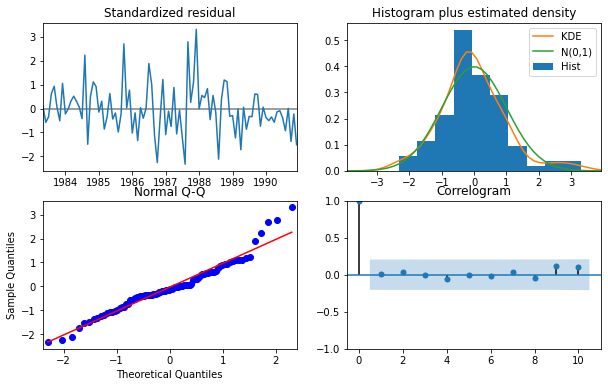

In [179]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

In [180]:
predicted_auto_SARIMA = results_auto_SARIMA.forecast(steps=len(SARIMA_test))
predicted_auto_SARIMA_train = results_auto_SARIMA.fittedvalues

In [181]:
predicted_auto_SARIMA_summaryframe=results_auto_SARIMA.get_forecast(steps=len(SARIMA_test))
predicted_auto_SARIMA_summaryframe.summary_frame(alpha=0.05).head()

Sales              mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1460.244631  412.922733     650.930945    2269.558317
1991-02-01  1392.437186  429.721262     550.198989    2234.675383
1991-03-01  1743.201690  430.065827     900.288157    2586.115222
1991-04-01  1650.066950  433.929989     799.579799    2500.554101
1991-05-01  1522.656024  434.242876     671.555626    2373.756421

In [182]:
rmse,mape=calc_metrics(SARIMA_test.Sales,predicted_auto_SARIMA)
tempDf = pd.DataFrame({'Test RMSE': [rmse],
                                'Test MAPE':[mape]}
                           ,index=['Auto SARIMA (1,1,2)(0,1,2,12)'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1279.322346      40.05
RegressionOnTimeSeasonal                             420.866517      13.29
Naive                                               3864.279352     152.87
SimpleAvg                                           1275.081804      38.90
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
SES Alpha=0                                         1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing                1375.393526      49.53
DES Alpha=0.647,Beta=0                              3850.779835     152.05
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.806115      12.08
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Auto ARIMA (2,1,2)                                  1374.696495      48.37
Auto SARIMA (1,1,2)(0,1,2,12)                        382.576712      12.87

In [183]:
resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAPE
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.806115      12.08
Auto SARIMA (1,1,2)(0,1,2,12)                        382.576712      12.87
RegressionOnTimeSeasonal                             420.866517      13.29
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
SimpleAvg                                           1275.081804      38.90
SES Alpha=0                                         1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
RegressionOnTime                                    1279.322346      40.05
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
Auto ARIMA (2,1,2)                                  1374.696495      48.37
Alpha=0.2,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
DES Alpha=0.647,Beta=0                              3850.779835     152.05
Naive                                               3864.279352     152.87

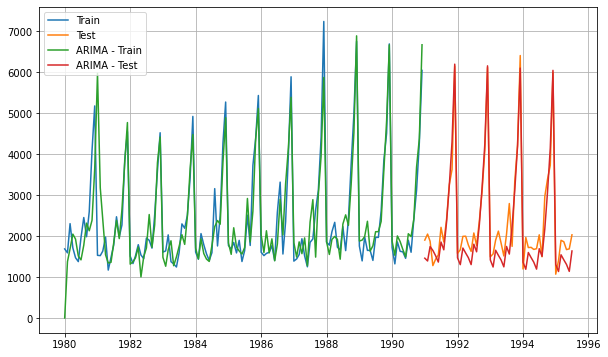

In [184]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')

plt.plot(SARIMA_train.index,predicted_auto_SARIMA_train,label='ARIMA - Train')
plt.plot(SARIMA_test.index,predicted_auto_SARIMA,label='ARIMA - Test')
plt.legend(loc='best')
plt.grid();

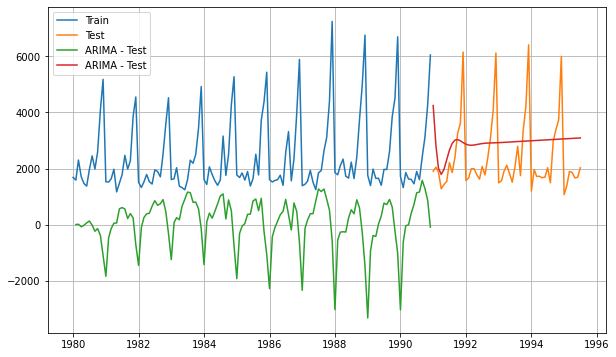

In [185]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')

plt.plot(ARIMA_train.index,ARIMA_train['Predicted'],label='ARIMA - Test')
plt.plot(ARIMA_test.index,ARIMA_test_result[0],label='ARIMA - Test')
plt.legend(loc='best')
plt.grid();

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


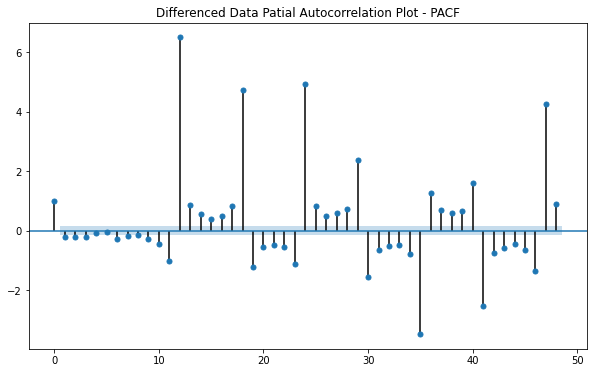

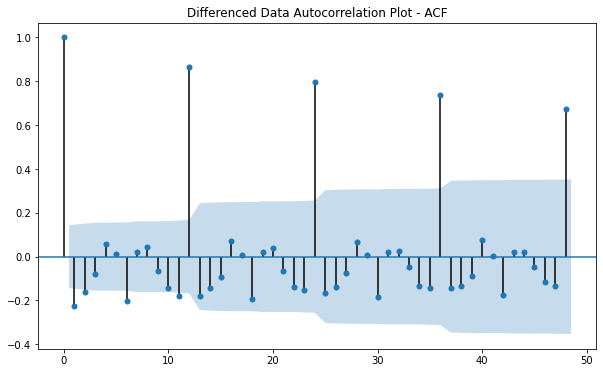

In [186]:
plot_pacf(sparkling.Sales.diff().dropna(),lags=48,title='Differenced Data Patial Autocorrelation Plot - PACF');
plot_acf(sparkling.Sales.diff().dropna(),lags=48,title='Differenced Data Autocorrelation Plot - ACF');

plt.show()

We have choosen alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the lag at which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at 6 and 3 respectively.

Here we see p=5.But as a rule of thumb p shouldn't be greater then 2. Thus we are taking p=2 and from ACF plot q=2.

In [187]:
ARIMA_train

Sales    Predicted
YearMonth                     
1980-01-01   1686          NaN
1980-02-01   1591     5.585861
1980-03-01   2304    17.351273
1980-04-01   1712   -73.716039
1980-05-01   1471   -22.126295
...           ...          ...
1990-08-01   1605  1165.904339
1990-09-01   2424  1581.093630
1990-10-01   3116  1291.773652
1990-11-01   4286   863.915928
1990-12-01   6047   -84.975416

[132 rows x 2 columns]

In [188]:
manual_ARIMA = ARIMA(ARIMA_train['Sales'], order=(3,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.180
Date:                Sun, 19 Dec 2021   AIC                           2228.928
Time:                        15:35:12   BIC                           2249.054
Sample:                    02-01-1980   HQIC                          2237.106
                         - 12-01-1990                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.9886      3.644      1.643      0.103      -1.154      13.131
ar.L1.D.Sales    -0.4420   8.18e-06  -5.41e+04      0.000      -0.442      -0.442
ar.L2.D.Sales     0.3081   2.58e-05   1.

In [189]:
manual_ARIMA = ARIMA(ARIMA_train['Sales'], order=(2,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.577
Date:                Sun, 19 Dec 2021   AIC                           2210.618
Time:                        15:35:12   BIC                           2227.869
Sample:                    02-01-1980   HQIC                          2217.627
                         - 12-01-1990                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.5859      0.516     10.820      0.000       4.574       6.598
ar.L1.D.Sales     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sales    -0.5601      0.074     

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [190]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(ARIMA_test))

In [191]:
predicted_manual_ARIMA_train=results_manual_ARIMA.fittedvalues

In [192]:
predicted_manual_ARIMA

(array([4246.61762125, 2817.97905573, 2013.85627548, 1794.57057071,
        1968.14612504, 2313.02046108, 2655.36730922, 2898.55287171,
        3017.23024989, 3033.34032289, 2988.94346047, 2925.16170114,
        2870.65573269, 2838.78729565, 2830.47027531, 2839.38073266,
        2856.97605442, 2875.95036469, 2891.81108093, 2902.94544542,
        2909.82191752, 2913.9387626 , 2916.93620926, 2920.05792608,
        2923.96447453, 2928.79806394, 2934.36927631, 2940.35791413,
        2946.46346277, 2952.48365773, 2958.32997625, 2964.00330097,
        2969.55433809, 2975.04698448, 2980.53397952, 2986.04650505,
        2991.59461705, 2997.17361928, 3002.7719152 , 3008.37740909,
        3013.9812364 , 3019.57891544, 3025.16972038, 3030.75523988,
        3036.33789791, 3041.91988281, 3047.5026157 , 3053.08667554,
        3058.67200147, 3064.2581919 , 3069.84477097, 3075.43135934,
        3081.0177418 , 3086.60385759, 3092.18975006]),
 array([1012.57669658, 1049.31446642, 1071.65527701, 1154.926

In [193]:
predicted_manual_ARIMA_train

YearMonth
1980-02-01       5.585861
1980-03-01      17.351273
1980-04-01     -73.716039
1980-05-01     -22.126295
1980-06-01      64.791054
                 ...     
1990-08-01    1165.904339
1990-09-01    1581.093630
1990-10-01    1291.773652
1990-11-01     863.915928
1990-12-01     -84.975416
Length: 131, dtype: float64

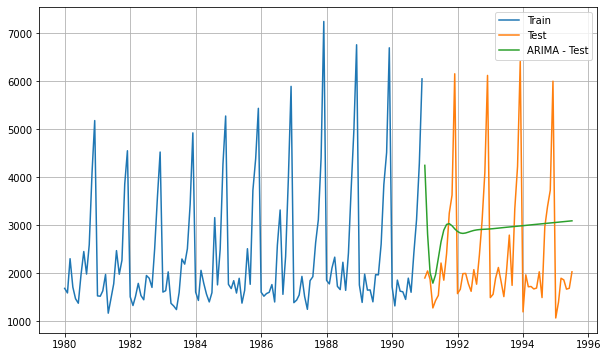

In [194]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')

#plt.plot(ARIMA_train.index,predicted_manual_ARIMA_train,label='ARIMA - Train')
plt.plot(ARIMA_test.index,predicted_manual_ARIMA[0],label='ARIMA - Test')
plt.legend(loc='best')
plt.grid();

In [195]:
rmse = metrics.mean_squared_error(ARIMA_test['Sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1374.6964952596556


In [196]:
rmse,mape=calc_metrics(ARIMA_test.Sales,predicted_manual_ARIMA[0])
tempDf = pd.DataFrame({'Test RMSE': [rmse],
                                'Test MAPE':[mape]}
                           ,index=['Manual ARIMA (2, 1, 2) '])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1279.322346      40.05
RegressionOnTimeSeasonal                             420.866517      13.29
Naive                                               3864.279352     152.87
SimpleAvg                                           1275.081804      38.90
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
SES Alpha=0                                         1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing                1375.393526      49.53
DES Alpha=0.647,Beta=0                              3850.779835     152.05
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.806115      12.08
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Auto ARIMA (2,1,2)                                  1374.696495      48.37
Auto SARIMA (1,1,2)(0,1,2,12)                        382.576712      12.87
Manual ARIMA (2, 1, 2)                              1374.696495      48.37

## SARIMA - Manual

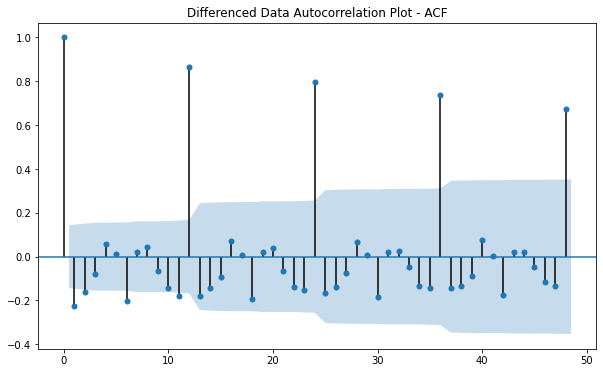

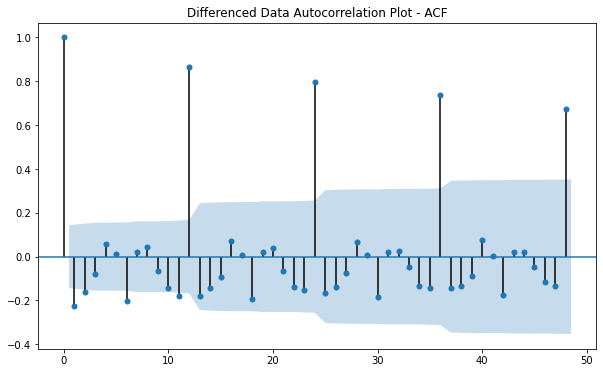

In [197]:
plot_acf(sparkling.Sales.diff().dropna(),lags=48,title='Differenced Data Autocorrelation Plot - ACF')


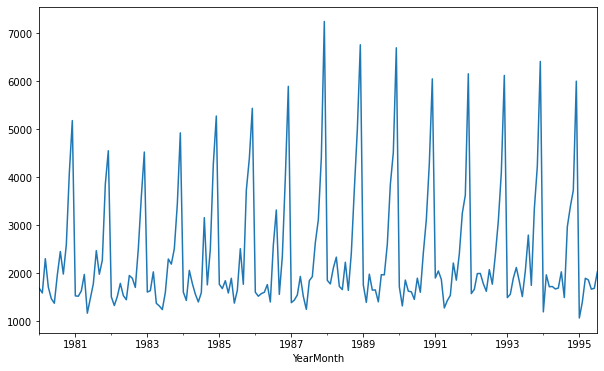

In [198]:
(sparkling.Sales).plot()

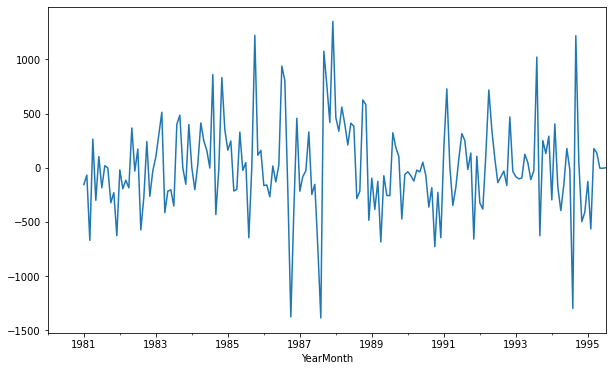

In [199]:
(sparkling.Sales.diff(12)).plot()

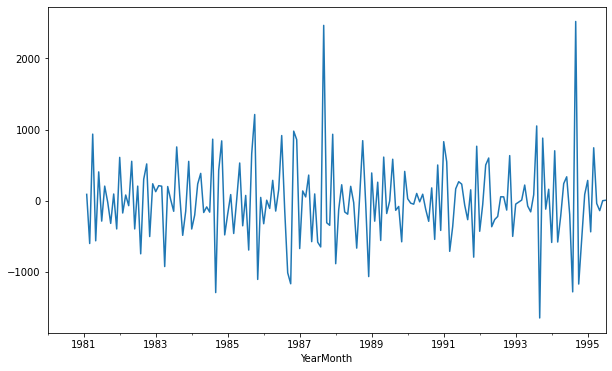

In [200]:
(sparkling.Sales.diff(12).diff()).plot()

In [201]:
dftest = adfuller(sparkling['Sales'].diff(12).diff().dropna())
dftest
print('DF test statistic is %3.3f' %dftest[0])

print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -5.114
DF test p-value is 0.0000


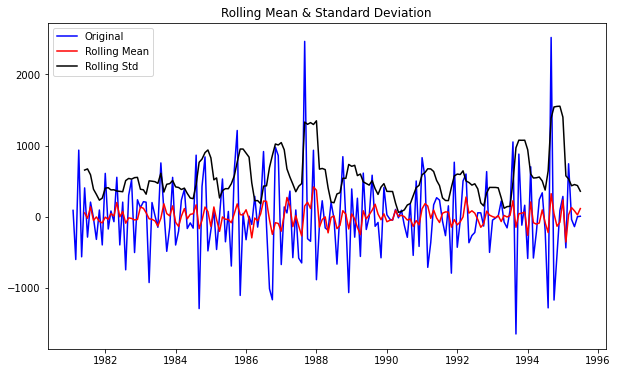

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [202]:
test_stationarity(sparkling['Sales'].diff(12).diff().dropna())

In [203]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


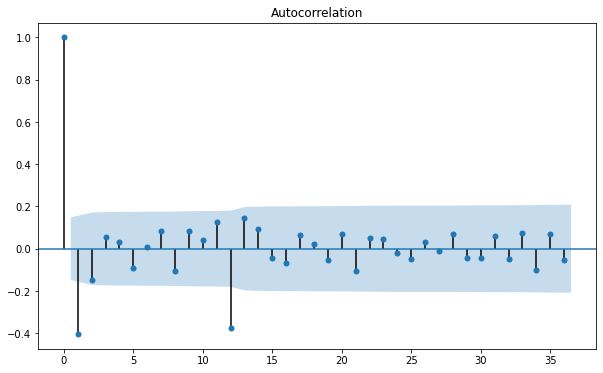

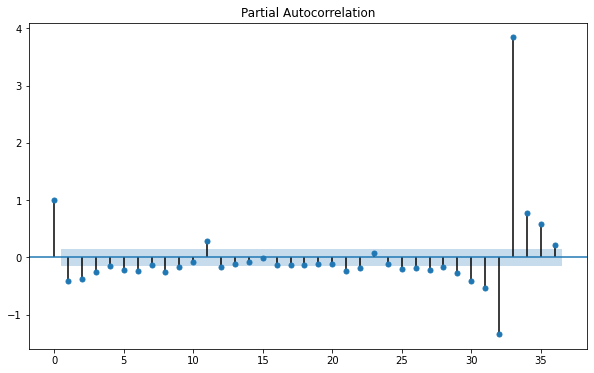

In [204]:
plot_acf((sparkling['Sales'].diff(12).dropna()).diff(1).dropna(),lags=36)
plot_pacf((sparkling['Sales'].diff(12).dropna()).diff(1).dropna(),lags=36);

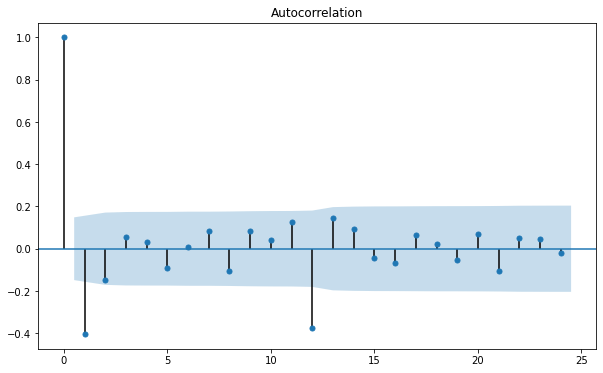

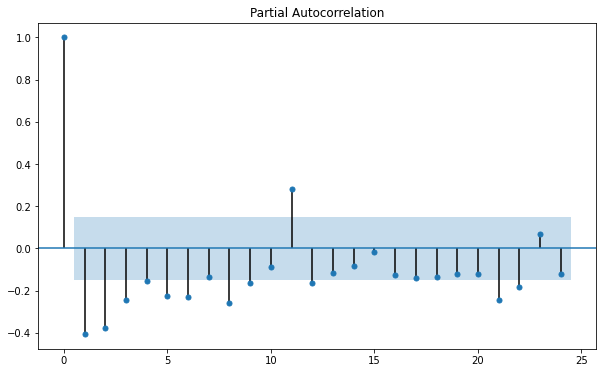

In [205]:
plot_acf((sparkling['Sales'].diff(12).dropna()).diff(1).dropna(),lags=24)
plot_pacf((sparkling['Sales'].diff(12).dropna()).diff(1).dropna(),lags=24);

In [206]:
manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(SARIMA_train['Sales'],
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 1, 12)   Log Likelihood                -692.592
Date:                            Sun, 19 Dec 2021   AIC                           1401.183
Time:                                    15:35:17   BIC                           1421.444
Sample:                                01-01-1980   HQIC                          1409.364
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5780      0.317     -1.824      0.068      -1.199       0.043
ar.L2          0.0176      0.159   

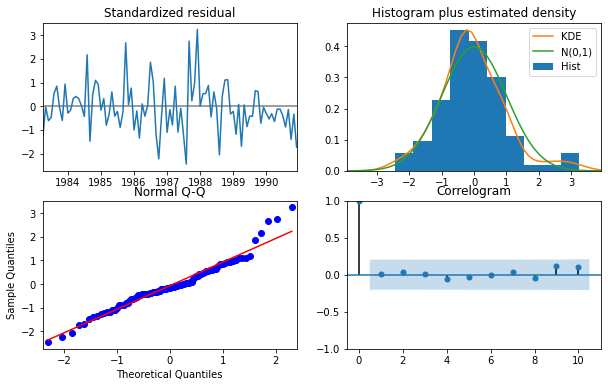

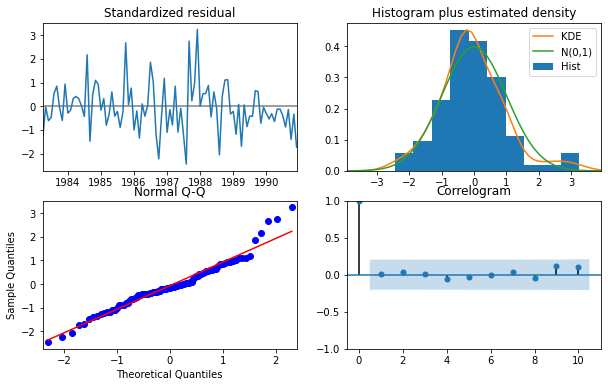

In [207]:
results_manual_SARIMA_12.plot_diagnostics()

In [208]:
final_hat_avg =test.copy()
pred_SARIMA_train = results_manual_SARIMA_12.get_forecast(steps=len(train))
pred_SARIMA_test = results_manual_SARIMA_12.get_forecast(steps=len(test))
pred_SARIMA_test.predicted_mean

1991-01-01    1484.186731
1991-02-01    1441.227662
1991-03-01    1784.566674
1991-04-01    1718.332172
1991-05-01    1550.815711
1991-06-01    1415.577344
1991-07-01    1892.880537
1991-08-01    1655.440584
1991-09-01    2392.592565
1991-10-01    3295.032137
1991-11-01    4374.077724
1991-12-01    6264.786766
1992-01-01    1521.343696
1992-02-01    1354.731874
1992-03-01    1772.728900
1992-04-01    1645.995069
1992-05-01    1520.274767
1992-06-01    1364.111564
1992-07-01    1852.353688
1992-08-01    1630.895455
1992-09-01    2366.357094
1992-10-01    3285.072596
1992-11-01    4331.030643
1992-12-01    6240.257452
1993-01-01    1487.745180
1993-02-01    1307.236616
1993-03-01    1731.616883
1993-04-01    1599.034542
1993-05-01    1481.372906
1993-06-01    1326.569543
1993-07-01    1809.435572
1993-08-01    1579.604919
1993-09-01    2323.456695
1993-10-01    3218.539320
1993-11-01    4279.232484
1993-12-01    6172.421037
1994-01-01    1439.341826
1994-02-01    1273.469589
1994-03-01  

In [209]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [210]:
predicted_manual_SARIMA_12_train=results_manual_SARIMA_12.fittedvalues
predicted_manual_SARIMA_12_train

YearMonth
1980-01-01       0.000000
1980-02-01    1361.177761
1980-03-01    1708.263832
1980-04-01    2024.840323
1980-05-01    1953.301337
                 ...     
1990-08-01    1968.449397
1990-09-01    2481.578620
1990-10-01    3696.429199
1990-11-01    4423.293429
1990-12-01    6765.248800
Length: 132, dtype: float64

In [211]:
predicted_manual_SARIMA_12.predicted_mean

1991-01-01    1484.186731
1991-02-01    1441.227662
1991-03-01    1784.566674
1991-04-01    1718.332172
1991-05-01    1550.815711
1991-06-01    1415.577344
1991-07-01    1892.880537
1991-08-01    1655.440584
1991-09-01    2392.592565
1991-10-01    3295.032137
1991-11-01    4374.077724
1991-12-01    6264.786766
1992-01-01    1521.343696
1992-02-01    1354.731874
1992-03-01    1772.728900
1992-04-01    1645.995069
1992-05-01    1520.274767
1992-06-01    1364.111564
1992-07-01    1852.353688
1992-08-01    1630.895455
1992-09-01    2366.357094
1992-10-01    3285.072596
1992-11-01    4331.030643
1992-12-01    6240.257452
1993-01-01    1487.745180
1993-02-01    1307.236616
1993-03-01    1731.616883
1993-04-01    1599.034542
1993-05-01    1481.372906
1993-06-01    1326.569543
1993-07-01    1809.435572
1993-08-01    1579.604919
1993-09-01    2323.456695
1993-10-01    3218.539320
1993-11-01    4279.232484
1993-12-01    6172.421037
1994-01-01    1439.341826
1994-02-01    1273.469589
1994-03-01  

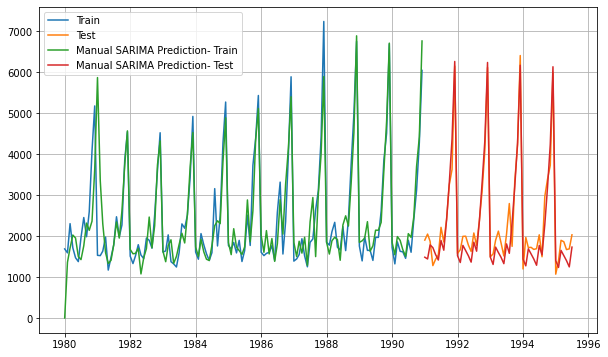

In [212]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')

plt.plot(SARIMA_train.index,predicted_manual_SARIMA_12_train,label='Manual SARIMA Prediction- Train')
plt.plot(SARIMA_test.index,predicted_manual_SARIMA_12.predicted_mean,label='Manual SARIMA Prediction- Test')
plt.legend(loc='best')
plt.grid();

In [213]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

Sales              mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1484.186731  413.724234     673.302133    2295.071328
1991-02-01  1441.227662  429.276070     599.862026    2282.593297
1991-03-01  1784.566674  429.760349     942.251867    2626.881480
1991-04-01  1718.332172  432.930206     869.804561    2566.859784
1991-05-01  1550.815711  433.002175     702.147042    2399.484380

In [214]:
rmse,mape=calc_metrics(SARIMA_test.Sales,predicted_manual_SARIMA_12.predicted_mean)
tempDf = pd.DataFrame({'Test RMSE': [rmse],
                                'Test MAPE':[mape]}
                           ,index=['Manual SARIMA (2, 1, 2)(2, 1, 1, 12)'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1279.322346      40.05
RegressionOnTimeSeasonal                             420.866517      13.29
Naive                                               3864.279352     152.87
SimpleAvg                                           1275.081804      38.90
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
SES Alpha=0                                         1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing                1375.393526      49.53
DES Alpha=0.647,Beta=0                              3850.779835     152.05
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.806115      12.08
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Auto ARIMA (2,1,2)                                  1374.696495      48.37
Auto SARIMA (1,1,2)(0,1,2,12)                        382.576712      12.87
Manual ARIMA (2, 1, 2)                              1374.696495      48.37
Manual SARIMA (2, 1, 2)(2, 1, 1, 12)                 353.176986      11.57

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [215]:
resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAPE
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Manual SARIMA (2, 1, 2)(2, 1, 1, 12)                 353.176986      11.57
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.806115      12.08
Auto SARIMA (1,1,2)(0,1,2,12)                        382.576712      12.87
RegressionOnTimeSeasonal                             420.866517      13.29
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
SimpleAvg                                           1275.081804      38.90
SES Alpha=0                                         1275.081813      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
RegressionOnTime                                    1279.322346      40.05
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
Manual ARIMA (2, 1, 2)                              1374.696495      48.37
Auto ARIMA (2,1,2)                                  1374.696495      48.37
Alpha=0.2,SimpleExponentialSmoothing                1375.393526      49.53
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
DES Alpha=0.647,Beta=0                              3850.779835     152.05
Naive                                               3864.279352     152.87

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [216]:
best_model = ExponentialSmoothing(sparkling['Sales'],seasonal_periods = 12 ,trend='additive',seasonal='additive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [217]:
best_model_fit = best_model.fit(smoothing_level=0.1,smoothing_slope=0,smoothing_seasonal=0.2)

In [218]:
predict_12months= best_model_fit.forecast(steps=12)
predict_12months.head()

1995-08-01    2010.585189
1995-09-01    2337.652819
1995-10-01    3207.740967
1995-11-01    4054.573393
1995-12-01    6095.743172
Freq: MS, dtype: float64

In [219]:
best_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    endog   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                       26131735.806
Optimized:                         True   AIC                           2247.492
Trend:                         Additive   BIC                           2299.190
Seasonal:                      Additive   AICC                          2251.564
Seasonal Periods:                    12   Date:                 Sun, 19 Dec 2021
Box-Cox:                          False   Time:                         15:35:19
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_slope                0.000000                 beta                False
smoothing_seasonal            0.2000000                gamma                False
initial_level                 1580.0000                  l.0                 True
initial_slope                  0.000000                  b.0                 True
initial_seasons.0             106.00000                  s.0                 True
initial_seasons.1             11.000000                  s.1                 True
initial_seasons.2             724.00000                  s.2                 True
initial_seasons.3             132.00000                  s.3                 True
initial_seasons.4            -109.00000                  s.4                 True
initial_seasons.5            -203.00000                  s.5                 True
initial_seasons.6             386.00000                  s.6                 True
initial_seasons.7             873.00000                  s.7                 True
initial_seasons.8             404.00000                  s.8                 True
initial_seasons.9             1016.0000                  s.9                 True
initial_seasons.10            2507.0000                 s.10                 True
initial_seasons.11            3599.0000                 s.11                 True
---------------------------------------------------------------------------------
"""

In [220]:
resid_std=best_model_fit.resid.std()

In [221]:
best_model_fit.resid.mean()

4.573984950042154

In [222]:
predict_12months

1995-08-01    2010.585189
1995-09-01    2337.652819
1995-10-01    3207.740967
1995-11-01    4054.573393
1995-12-01    6095.743172
1996-01-01    1424.412332
1996-02-01    1607.416418
1996-03-01    1860.482182
1996-04-01    1798.487021
1996-05-01    1651.450777
1996-06-01    1546.305590
1996-07-01    2002.224942
Freq: MS, dtype: float64

In [223]:
a=predict_12months+1.96*resid_std
b=predict_12months-1.96*resid_std

In [224]:
sales=pd.DataFrame()
sales['Predicted']=predict_12months
sales['CI_Lower']=a
sales['CI_Upper']=b

In [225]:
sales

Predicted     CI_Lower     CI_Upper
1995-08-01  2010.585189  2745.185684  1275.984695
1995-09-01  2337.652819  3072.253313  1603.052325
1995-10-01  3207.740967  3942.341462  2473.140473
1995-11-01  4054.573393  4789.173887  3319.972899
1995-12-01  6095.743172  6830.343666  5361.142677
1996-01-01  1424.412332  2159.012827   689.811838
1996-02-01  1607.416418  2342.016912   872.815924
1996-03-01  1860.482182  2595.082676  1125.881688
1996-04-01  1798.487021  2533.087515  1063.886527
1996-05-01  1651.450777  2386.051271   916.850283
1996-06-01  1546.305590  2280.906084   811.705096
1996-07-01  2002.224942  2736.825436  1267.624448

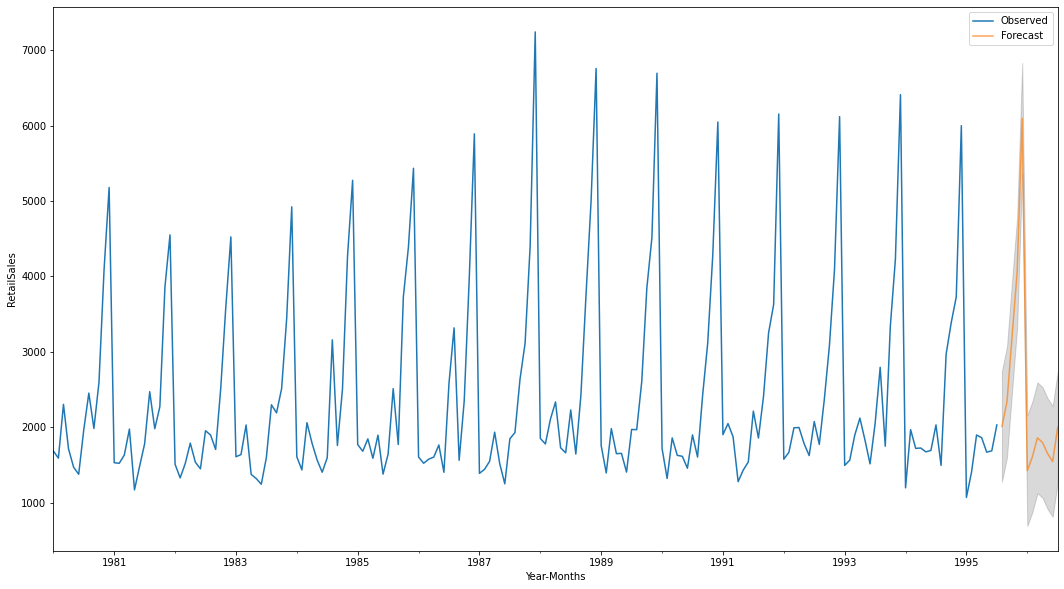

In [226]:
plt.figure(figsize=(18,10))
axis = sparkling['Sales'].plot(label='Observed')
predict_12months.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(sales.index, sales['CI_Lower'], 
                  sales['CI_Upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()